In [ ]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)




Mounted at /content/gdrive


on peut faire du clustering sur l'ensemble des métiers pour voir les mtiers similaires et voir ceux qui sont très éloigne. et on peut également faire du clustering au niveau des diplômes pour voir les similarités et les différences et on peut également faire du clustering sur l'ensemble des outils de la tech pour voir les similarités et les differences et faire des corrélation entre les outils de la tech et sur les métiers de la data et les IDE et les cloud et les outils de machine learning

je dois revoir la notion de réduction de dimension sur le clustering

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/kaggle_survey_2020_responses.csv')
df=df.drop(0)
df.head()

<ipython-input-4-f4aa91db3ab1>:1: DtypeWarning: Columns (0,18,31,45,50,63,80,92,99,105,130,171,187,241,254,266,278,289,307,322,330,342,353) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/My Drive/kaggle_survey_2020_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# un aperçu des colonnes par le biais des index

df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [ ]:
print(list(df.columns))
#Affichage toutes les colonnes du df par le biais d'une liste

['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 'Q9_OTHER', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_OTHER', 'Q11', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER', 'Q13', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_

In [ ]:
# affichage du type de colonne dans le df

for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Time from Start to Finish (seconds): object
Q1: object
Q2: object
Q3: object
Q4: object
Q5: object
Q6: object
Q7_Part_1: object
Q7_Part_2: object
Q7_Part_3: object
Q7_Part_4: object
Q7_Part_5: object
Q7_Part_6: object
Q7_Part_7: object
Q7_Part_8: object
Q7_Part_9: object
Q7_Part_10: object
Q7_Part_11: object
Q7_Part_12: object
Q7_OTHER: object
Q8: object
Q9_Part_1: object
Q9_Part_2: object
Q9_Part_3: object
Q9_Part_4: object
Q9_Part_5: object
Q9_Part_6: object
Q9_Part_7: object
Q9_Part_8: object
Q9_Part_9: object
Q9_Part_10: object
Q9_Part_11: object
Q9_OTHER: object
Q10_Part_1: object
Q10_Part_2: object
Q10_Part_3: object
Q10_Part_4: object
Q10_Part_5: object
Q10_Part_6: object
Q10_Part_7: object
Q10_Part_8: object
Q10_Part_9: object
Q10_Part_10: object
Q10_Part_11: object
Q10_Part_12: object
Q10_Part_13: object
Q10_OTHER: object
Q11: object
Q12_Part_1: object
Q12_Part_2: object
Q12_Part_3: object
Q12_OTHER: object
Q13: object
Q14_Part_1: object
Q14_Part_2: object
Q14_Part_3: object
Q

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')  # Convertit nombres en int/float

print(df.dtypes)

<ipython-input-8-e28b64e60dd1>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convertit nombres en int/float


Time from Start to Finish (seconds)      int64
Q1                                      object
Q2                                      object
Q3                                      object
Q4                                      object
                                        ...   
Q35_B_Part_7                            object
Q35_B_Part_8                            object
Q35_B_Part_9                            object
Q35_B_Part_10                          float64
Q35_B_OTHER                             object
Length: 355, dtype: object


In [ ]:
# les différents type de chaque colonnes

print(df.dtypes.value_counts())


object     332
float64     22
int64        1
Name: count, dtype: int64


In [ ]:
# on détecte les doublons qui sont du df
les_doublons_de_mon_df= df.duplicated().sum()
print(les_doublons_de_mon_df)

19


In [ ]:
# On détecte les colonnes contenant au moins une valeur manquante
df.isna().any(axis = 0)

,0
Time from Start to Finish (seconds),False
Q1,False
Q2,False
Q3,False
Q4,True
...,...
Q35_B_Part_7,True
Q35_B_Part_8,True
Q35_B_Part_9,True
Q35_B_Part_10,True


In [ ]:
# On compte le nombre de valeurs manquantes pour chaque colonne
df.isnull().sum(axis = 0)


,0
Time from Start to Finish (seconds),0
Q1,0
Q2,0
Q3,0
Q4,467
...,...
Q35_B_Part_7,19556
Q35_B_Part_8,19190
Q35_B_Part_9,19517
Q35_B_Part_10,20036


In [ ]:
# On compte le nombre de valeurs manquantes pour chaque ligne
df.isnull().sum(axis = 1)


,0
1,271
2,284
3,317
4,303
5,346
...,...
20032,350
20033,320
20034,332
20035,270


In [ ]:
# Quelles sont les colonnes qui contiennent des NANs
colonnes_na = df.isna().any(axis = 0)

print(colonnes_na.sum(), "colonnes de df contiennent des NANs. \n")


351 colonnes de df contiennent des NANs. 



In [ ]:
# Quelles sont les lignes qui contiennent des NANs
lignes_na = df.isna().any(axis = 1)

print(lignes_na.sum(), "lignes de df contiennent des NANs. \n")


20036 lignes de df contiennent des NANs. 



In [ ]:
# Nombre de NANs par colonne
colonnes_nbna = df.isna().sum(axis = 0)

print("La colonne contenant le plus de NANs est:", colonnes_nbna.idxmax())


La colonne contenant le plus de NANs est: Q7_Part_12


**exploration colonne par colonne du data frame  **

In [ ]:
#JE SUPPRIME LES COLONNES A PARTIR D'ICI
# JE SUPPRIME LES 700 PERSONNES QUI ON REPONDU JUSQU'À LA QUESTION 4.
# JE SUPPRIME LES 657 PERSONNES QUI REPONDU JUSQU'À LA QUESTION 5.


# Étape 1 : Supprimer les lignes où les réponses s'arrêtent uniquement à la question 4
colonnes_apres_q4 = df.columns[4:]  # Colonnes après la question 4
ligne_a_supprimer_q4 = df[colonnes_apres_q4].isna().all(axis=1)  # Toutes les colonnes après Q4 sont vides
df_cleaned_q4 = df[~ligne_a_supprimer_q4]  # Conserver uniquement les lignes valides

# Étape 2 : Supprimer les lignes où les réponses s'arrêtent uniquement à la question 5
colonnes_apres_q5 = df_cleaned_q4.columns[5:]  # Colonnes après la question 5
ligne_a_supprimer_q5 = df_cleaned_q4[colonnes_apres_q5].isna().all(axis=1)  # Toutes les colonnes après Q5 sont vides
df_cleaned_q5 = df_cleaned_q4[~ligne_a_supprimer_q5]  # Conserver uniquement les lignes valides

# Afficher la taille des DataFrames pour vérification
print("Taille initiale :", df.shape)
print("Taille après suppression des lignes s'arrêtant à Q4 :", df_cleaned_q4.shape)
print("Taille après suppression des lignes s'arrêtant à Q5 :", df_cleaned_q5.shape)

# Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV (optionnel)
#df_cleaned_q5.to_csv("fichier_nettoye.csv", index=False)

df.info()

Taille initiale : (20036, 355)
Taille après suppression des lignes s'arrêtant à Q4 : (19569, 355)
Taille après suppression des lignes s'arrêtant à Q5 : (19277, 355)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: float64(22), int64(1), object(332)
memory usage: 54.3+ MB


In [ ]:
#Time from Start to Finish (seconds) Duration (in seconds):
# CETTE COLONNE N'EST PAS PRISE EN COMPTE

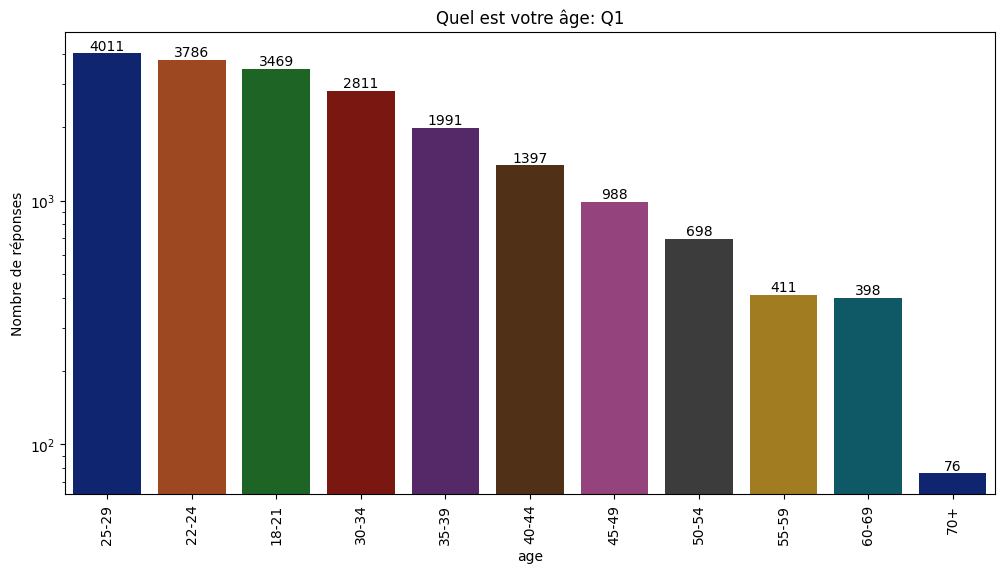

In [ ]:
#Q1. What is your age (# years)? :
#Q1. Quel est votre âge (# ans) ? :


# Compter les occurrences de chaque age
age_counts = df["Q1"].value_counts()
# Trier les ages par ordre décroissant
age_counts = age_counts.sort_values(ascending=False)
# Tracer le graphique en utilisant les valeurs triées
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index , palette="dark")
#Garder une échelle logarithmique
plt.yscale('log')
# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=90)
# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container)
plt.title("Quel est votre âge: Q1")
plt.xlabel("age")
plt.ylabel("Nombre de réponses")
plt.show();



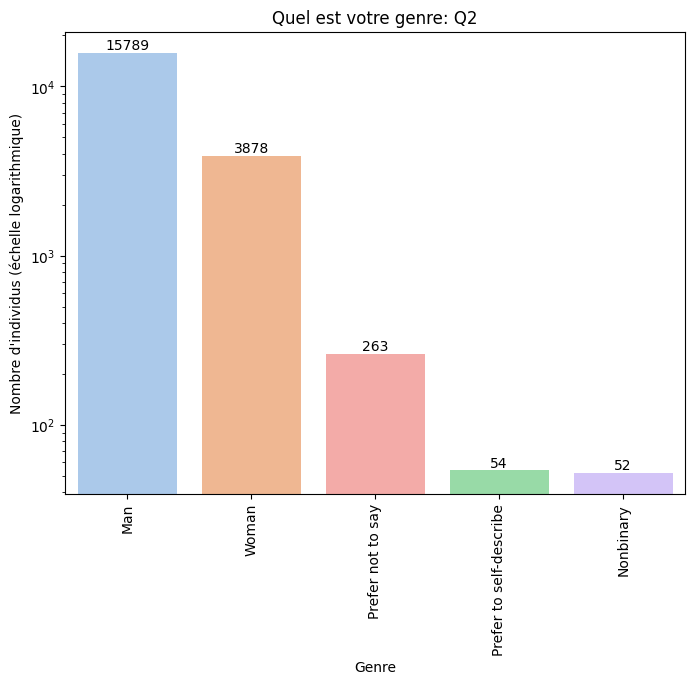

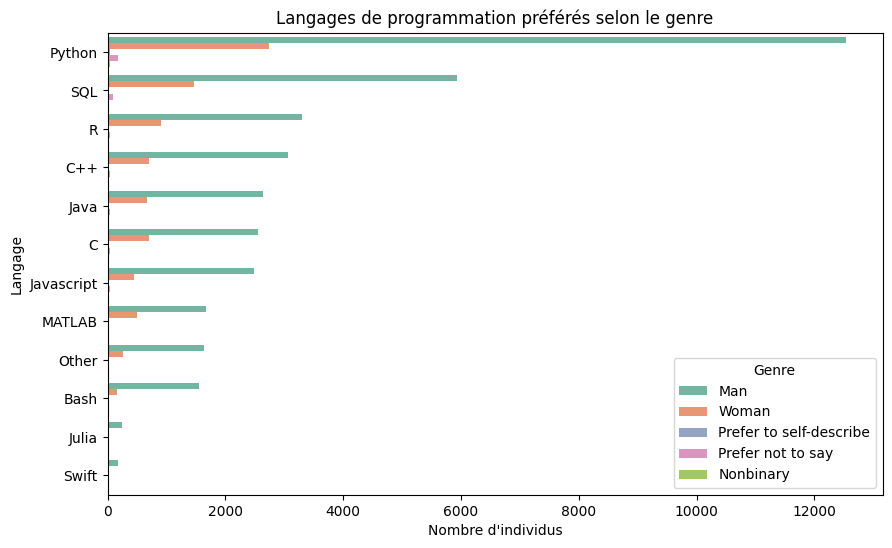

In [ ]:
#Q2. What is your gender? - Selected Choice
#Q2. Quel est votre sexe ? - Choix sélectionné



# Définir la taille de la figure
plt.figure(figsize=(8, 6))

# Trier les valeurs de Q2 du plus grand au plus petit
order_sorted = df['Q2'].value_counts().index

# Tracer le graphique avec les barres triées
ax = sns.countplot(x='Q2', data=df, palette="pastel", order=order_sorted, hue= 'Q2')

# Appliquer une échelle logarithmique sur l'axe Y
ax.set_yscale('log')

# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container)

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=90)
plt.title("Quel est votre genre: Q2")
plt.xlabel("Genre")
plt.ylabel("Nombre d'individus (échelle logarithmique)")

# Afficher le graphique
plt.show()




# Sélectionner toutes les colonnes qui commencent par "Q7"
Q7_columns = [col for col in df.columns if "Q7" in col]

# Convertir les réponses multiples en une seule colonne
responses = pd.melt(df[Q7_columns], value_name="Langage")["Langage"].dropna()

# Compter les occurrences
langage_counts = responses.value_counts()
plt.figure(figsize=(10,6))

# Trier les langages du plus utilisé au moins utilisé
sorted_langages = langage_counts.index

# Graphique avec `hue="Q2"` pour comparer selon le genre
sns.countplot(data=df.melt(id_vars="Q2", value_vars=Q7_columns, value_name="Langage"),
              y="Langage", hue="Q2", order=sorted_langages, palette="Set2")

plt.title("Langages de programmation préférés selon le genre")
plt.xlabel("Nombre d'individus")
plt.ylabel("Langage")
plt.legend(title="Genre")
plt.show()





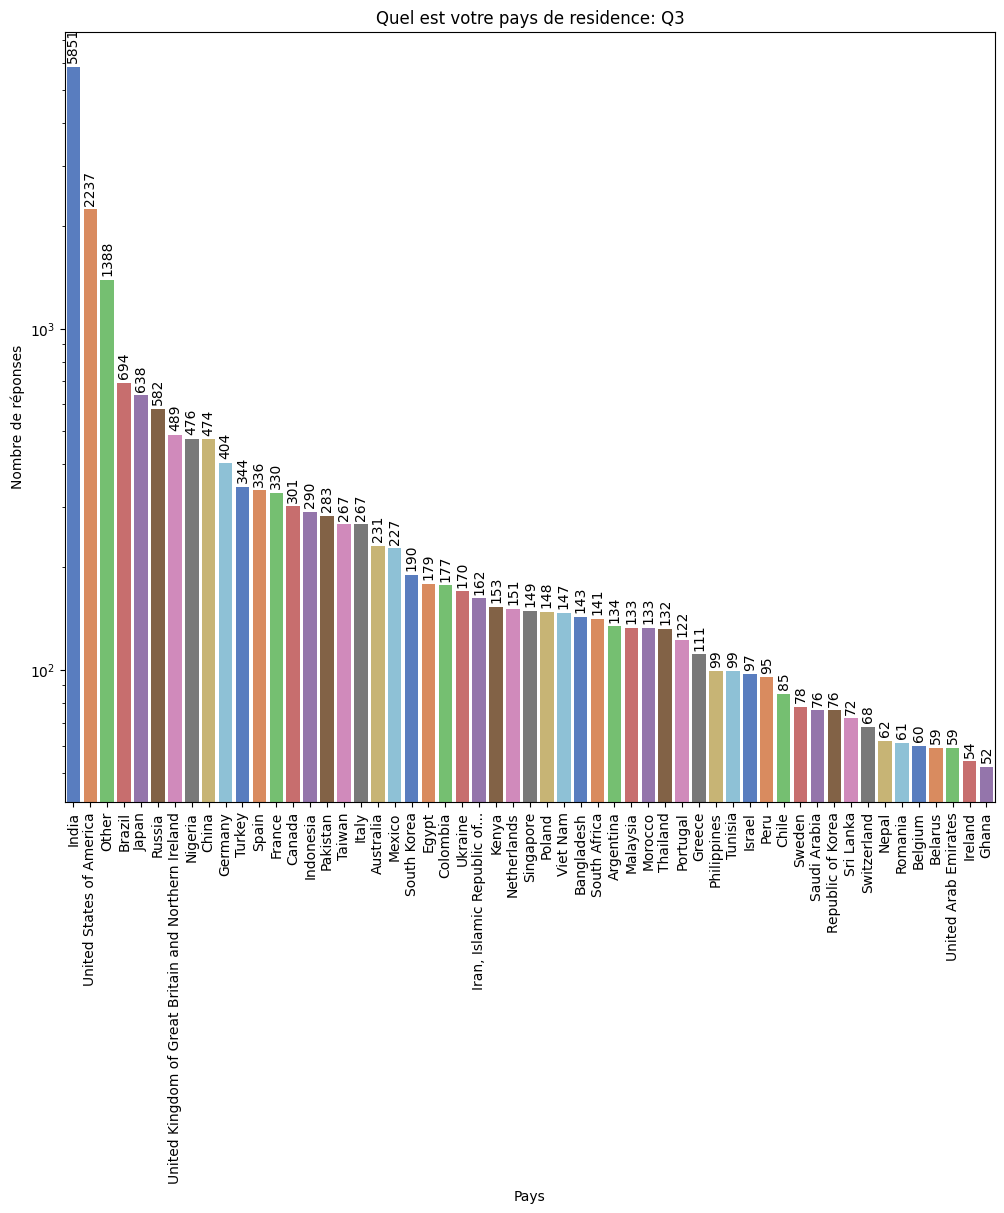

In [ ]:
#Q3. In which country do you currently reside?
#Q3. Dans quel pays résidez-vous actuellement ?

# Compter les occurrences de chaque pays
country_counts = df["Q3"].value_counts()
# Trier les pays par ordre décroissant
country_counts = country_counts.sort_values(ascending=False)
# Tracer le graphique en utilisant les valeurs triées
plt.figure(figsize=(12, 10))
ax=sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index , palette="muted")
# Ajouter les valeurs sur les barres
for i, v in enumerate(country_counts.values):
    ax.text(i, v + 0.05 * v, str(v), ha='center', fontsize=10, color='black', rotation=90)
#Garder une échelle logarithmique
plt.yscale('log')
# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=90)
plt.title("Quel est votre pays de residence: Q3")
plt.xlabel("Pays")
plt.ylabel("Nombre de réponses")
plt.show();




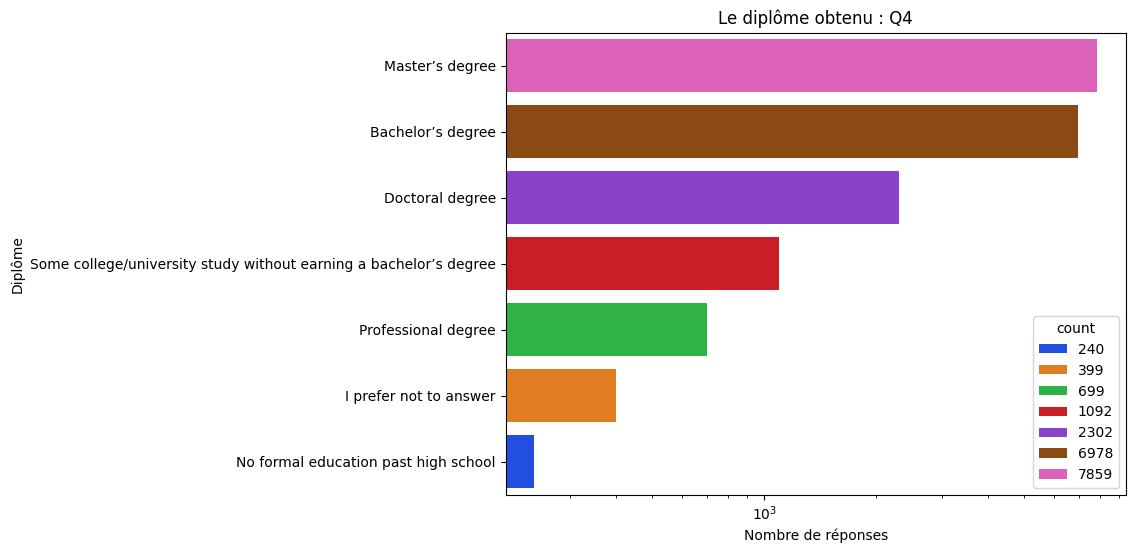

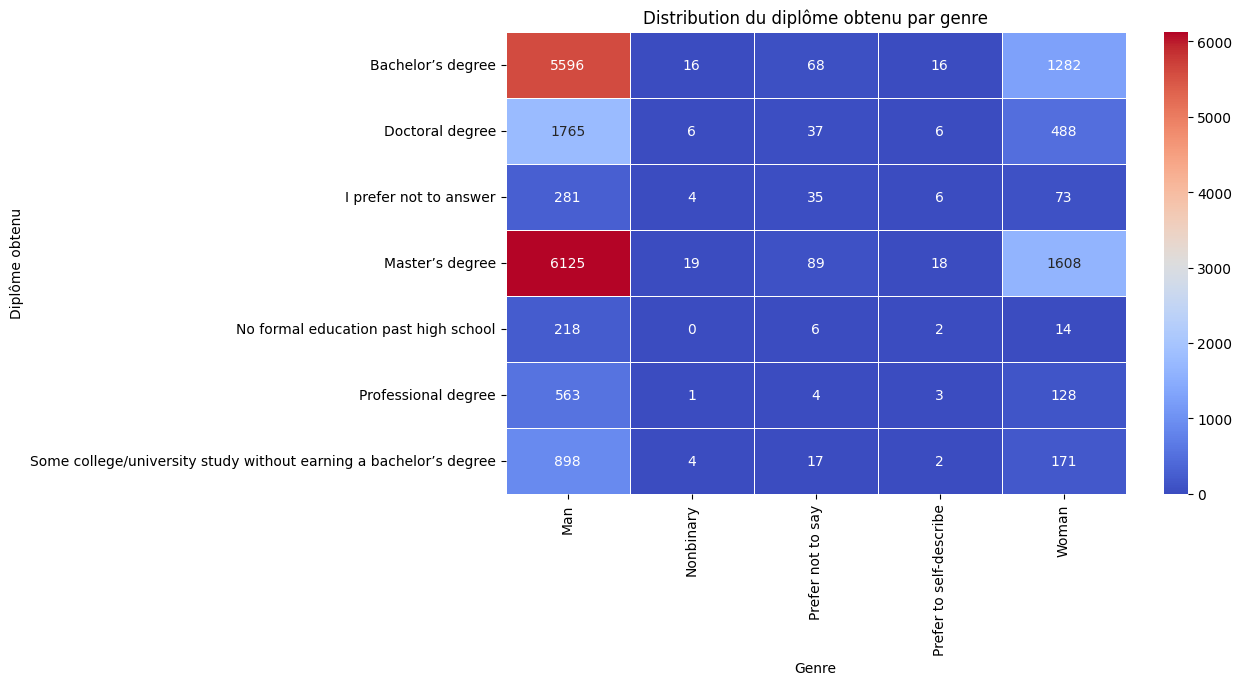

In [ ]:

#Q4. What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
#Q4. Quel est le niveau d’éducation formelle le plus élevé que vous avez atteint ou envisagez d’atteindre au cours des 2 prochaines années ?

# Compter les occurrences des diplômes
degree_counts = df["Q4"].value_counts()

# Trier les diplômes par ordre décroissant
degree_counts = degree_counts.sort_values(ascending=False)

# Tracer le graphique avec des barres horizontales
plt.figure(figsize=(8, 6))  # Ajustement de la taille
ax = sns.barplot(y=degree_counts.index, x=degree_counts.values, palette="bright", hue= degree_counts)  # Inversion des axes

# Mettre l'échelle logarithmique si nécessaire
plt.xscale('log')  # On met l'échelle sur l'axe X cette fois

# Ajouter un titre et labels
plt.title("Le diplôme obtenu : Q4")
plt.xlabel("Nombre de réponses")
plt.ylabel("Diplôme")

# Afficher le graphique
plt.show()




plt.figure(figsize=(10,6))

# Créer un tableau croisé pour la heatmap
pivot_table = df.pivot_table(index="Q4", columns="Q2", aggfunc="size", fill_value=0)

# Tracer la heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)

plt.title("Distribution du diplôme obtenu par genre")
plt.xlabel("Genre")
plt.ylabel("Diplôme obtenu")
plt.show()

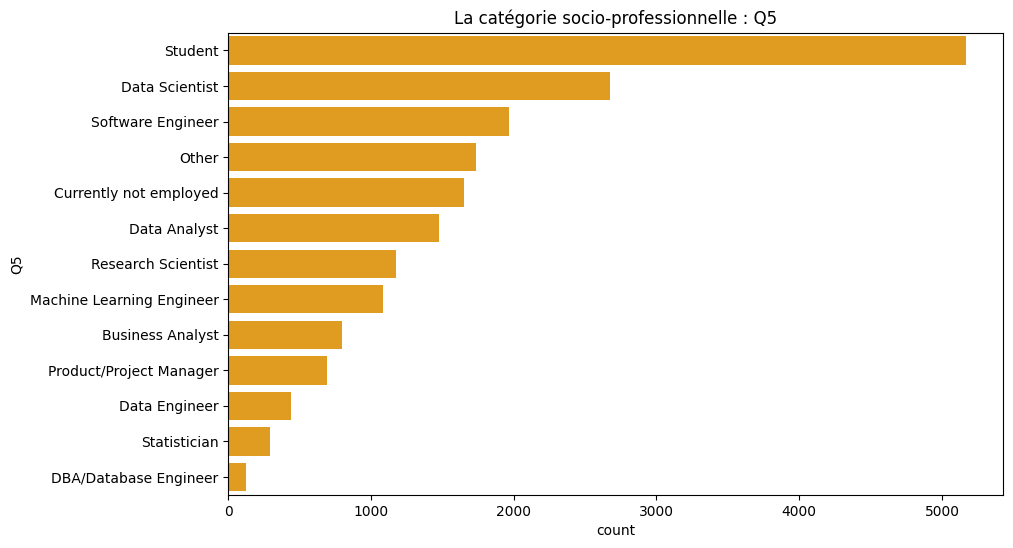

In [ ]:
#Q5. Select the title most similar to your current role (or most recent title if retired): - Selected ChoiceQ5 = df['Q5'].mode()
#Q5. Sélectionnez le titre le plus similaire à votre rôle actuel (ou le titre le plus récent si vous êtes retraité) : - Choix sélectionné

#Trier les catégories de Q5 par fréquence décroissante
sorted_order = df['Q5'].value_counts().index

#Tracer le graphique avec les barres triées

#Ajustement de la taille
plt.figure(figsize=(10, 6))

#Tri des catégories
sns.countplot(y='Q5', data=df, color='orange', order=sorted_order)

#Ajouter un titre
plt.title("La catégorie socio-professionnelle : Q5")

#Afficher le graphique
plt.show()




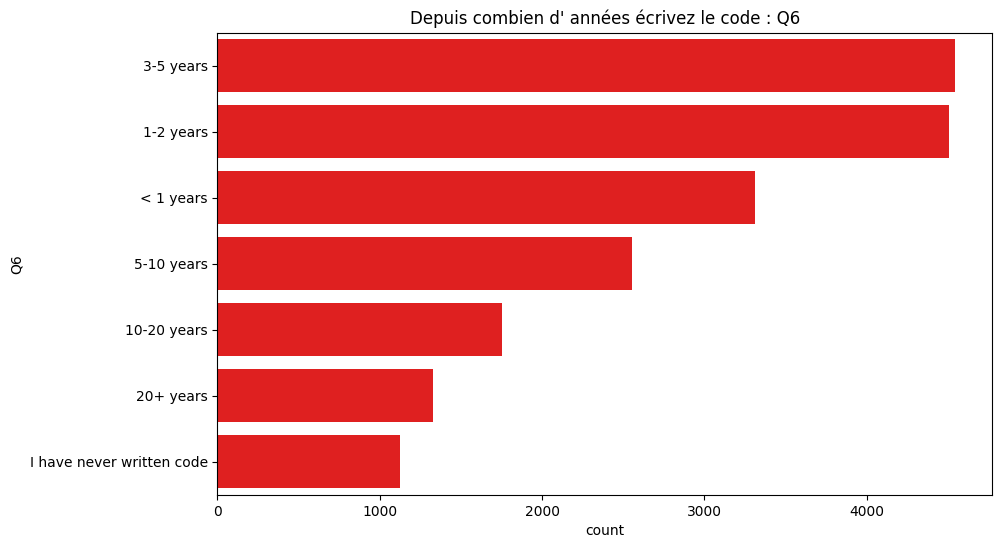

<Figure size 1400x900 with 0 Axes>

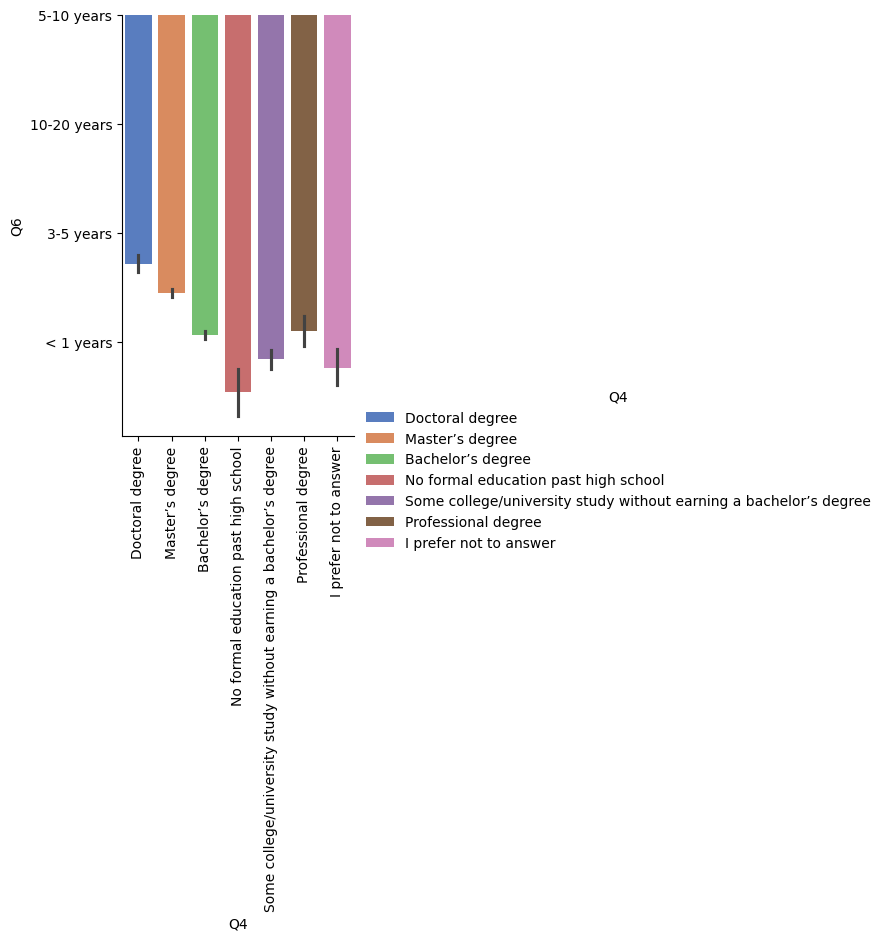

In [ ]:
#Q6. For how many years have you been writing code and/or programming?
#Q6. Depuis combien d’années écrivez-vous du code et/ou de la programmation ?


#Trier les catégories de Q6 par fréquence décroissante
sorted_order = df['Q6'].value_counts().index

#Tracer le graphique avec les barres triées

#Ajustement de la taille
plt.figure(figsize=(10, 6))

#Tri des catégories
sns.countplot(y='Q6', data=df, color='red', order=sorted_order)

#Ajouter un titre
plt.title("Depuis combien d' années écrivez le code : Q6")

#Afficher le graphique
plt.show()








#Ajustement de la taille
plt.figure(figsize=(14, 9))
sns.catplot(x='Q4', y= 'Q6',  data=df , hue='Q4', kind='bar', palette='muted')
plt.xticks(rotation=90)
plt.show();



<ipython-input-10-ff926b2bd995>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=response_counts, x='Nombre', y='Réponse', palette='viridis')


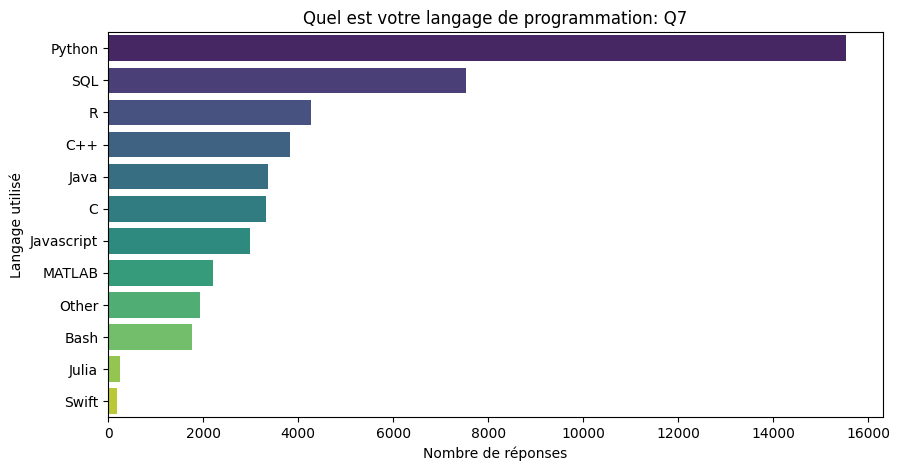

In [ ]:
#Q7_Part_1. What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
#Q7. Quels langages de programmation utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Python
# la question Q7_Part_1 a 13 parties.


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q7 ou q7


# Sélectionner les colonnes contenant "Q7" ou "q7"
q7_columns = [col for col in df.columns if 'Q7' in col or 'q7' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[q7_columns], value_name="Réponse")['Réponse'].dropna()

# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']

# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', palette='viridis')

# Étiquettes et titre
plt.xlabel("Nombre de réponses")
plt.ylabel("Langage utilisé")
plt.title("Quel est votre langage de programmation: Q7")
# Affichage
plt.show()



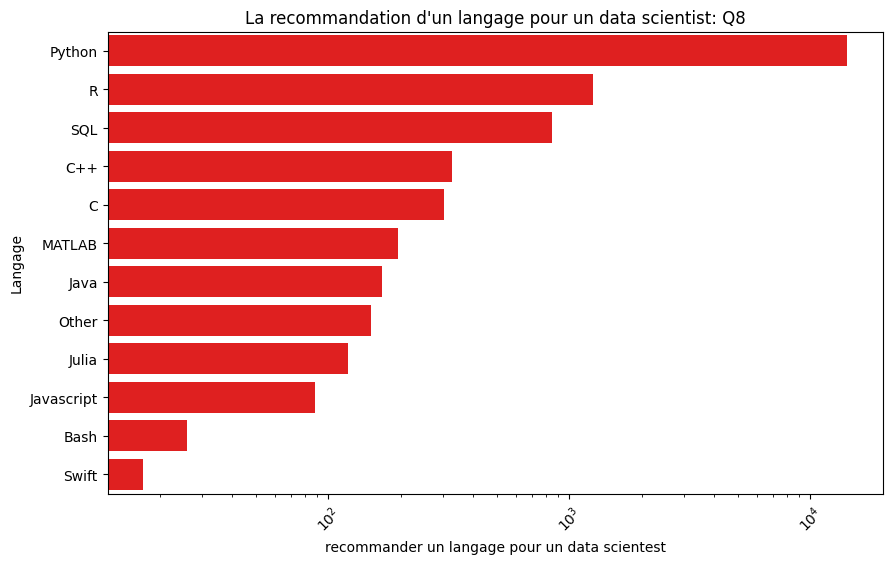

In [ ]:
#Q8.  What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
#Q8.  Quel langage de programmation recommanderiez-vous à un aspirant data scientist d'apprendre en premier ? - Choix sélectionné


#Ajustement de la taille
plt.figure(figsize=(10, 6))
#Trier les catégories de Q6 par fréquence décroissante
oder= orted_order = df['Q8'].value_counts().index
#Tracer le graphique avec les barres triées
sns.countplot(y='Q8', data=df, color='red', order=sorted_order)
# On met l'échelle sur l'axe X cette fois
plt.xscale('log')
plt.xlabel("recommander un langage pour un data scientest")
plt.xticks(rotation=45)
plt.ylabel("Langage")
plt.title("La recommandation d'un langage pour un data scientist: Q8")
plt.show();

#Afficher le graphique
plt.show()




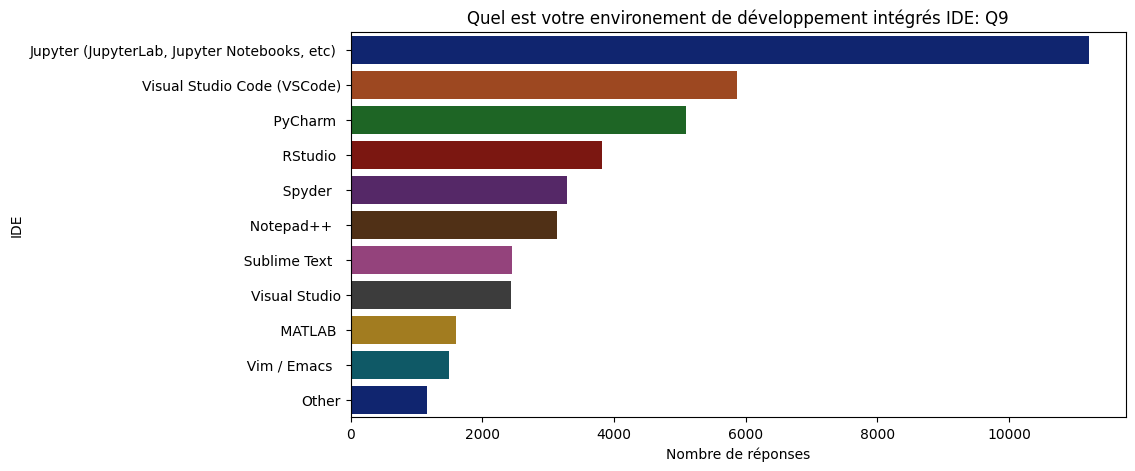

In [ ]:
#Q9_Part_1.  Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)
#Q9_Part_1.  Parmi les environnements de développement intégrés (IDE) suivants, lesquels utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Jupyter (JupyterLab, Jupyter Notebooks, etc.)
# la question 9 a 12 parties




# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q9

Q9_columns = [col for col in df.columns if 'Q9' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q9_columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']

# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette='dark')
plt.xlabel("Nombre de réponses")
plt.ylabel("IDE")
plt.title("Quel est votre environement de développement intégrés IDE: Q9")
plt.xlabel("Nombre de réponses")
plt.ylabel("IDE")
plt.show()







<ipython-input-35-95a402ab6d9c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=response_counts, x='Nombre', y='Réponse', legend=False, palette='muted')


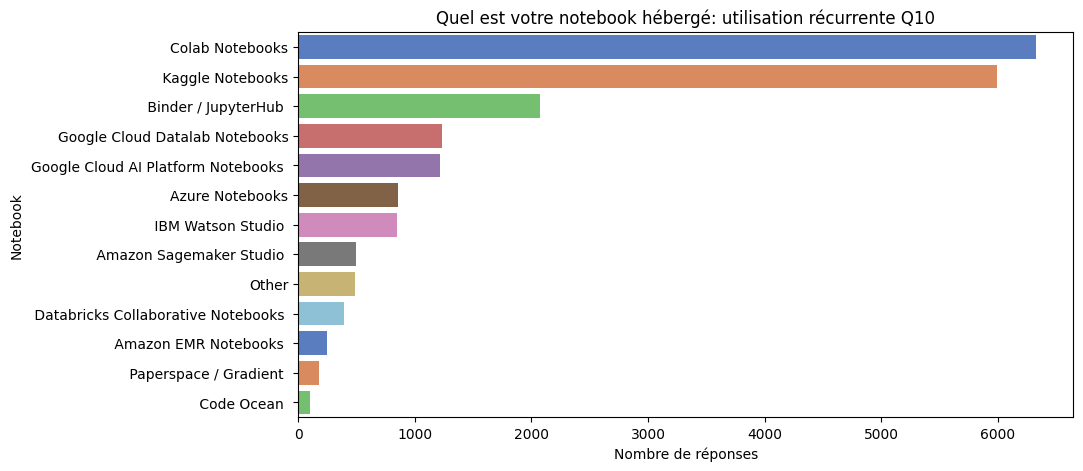

In [ ]:
#Q10. Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks
#Q10. Parmi les produits de notebook hébergés suivants, lesquels utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) – Choix sélectionné – Colab Notebooks
# la question 10 a 14 parties.

# Sélectionner les colonnes commençant par Q10
Q10_columns = [col for col in df.columns if 'Q10' in col or 'q10' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df, value_vars=Q10_columns, var_name="Question", value_name="Réponse")['Réponse'].dropna()

# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']

# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', legend=False, palette='muted')

plt.xlabel("Nombre de réponses")
plt.ylabel("Notebook")
plt.title("Quel est votre notebook hébergé: utilisation récurrente Q10")

plt.show()


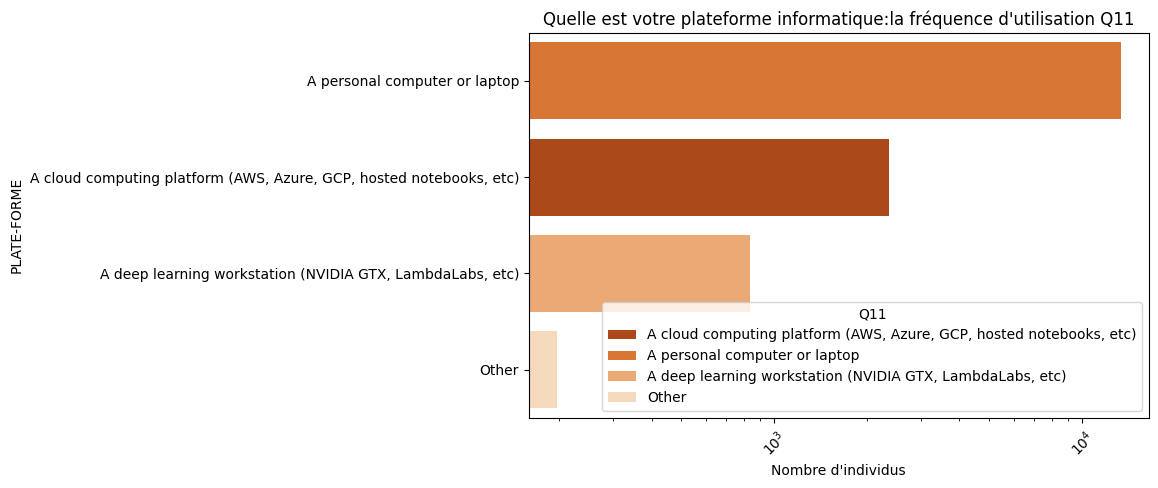

In [ ]:
#Q11. What type of computing platform do you use most often for your data science projects? - Selected Choice
#Q11. Quel type de plateforme informatique utilisez-vous le plus souvent pour vos projets de science des données ? - Choix sélectionné

# la taille du graphique
plt.figure(figsize=(8,5))
# Compter le nombre d'occurences de plateforme informatique
type_de_plate_forme= df['Q11'].value_counts().sort_index()
# tracer le graphique avec des barres triées
sns.countplot(y='Q11', data=df, order=sorted_order, palette="Oranges_r", hue = "Q11")
# Ajustement de la taille
plt.xscale('log')
plt.ylabel("PLATE-FORME")
plt.xticks(rotation=45)
plt.xlabel("Nombre d'individus")
#affiche le titre du graphique
plt.title("Quelle est votre plateforme informatique:la fréquence d'utilisation Q11")
#Afficher le graphique
plt.show();


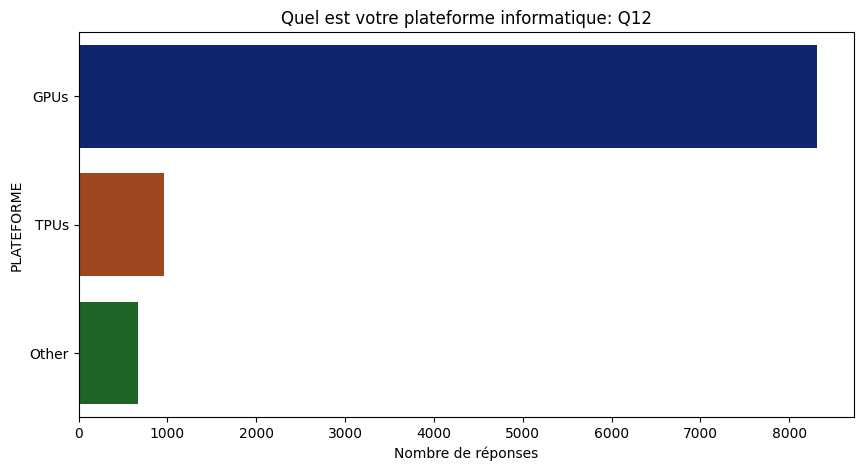

['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER']


In [ ]:
#Q12. Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - GPUs
#Q12. Quel type de plateforme informatique utilisez-vous le plus souvent pour vos projets de science des données ? - Choix sélectionné
# la question 12 à 4 parties


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q10

Q12_Part_1columns = [col for col in df.columns if 'Q12' in col ]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q12_columns], value_name="Réponse")['Réponse'].dropna()
# Compter le nombre d'occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']

# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette='dark')
plt.xlabel("Nombre de réponses")
plt.ylabel("PLATEFORME")
plt.title("Quel est votre plateforme informatique: Q12")
plt.xlabel("Nombre de réponses")
plt.ylabel("PLATEFORME")
plt.show()
print(Q12_columns)

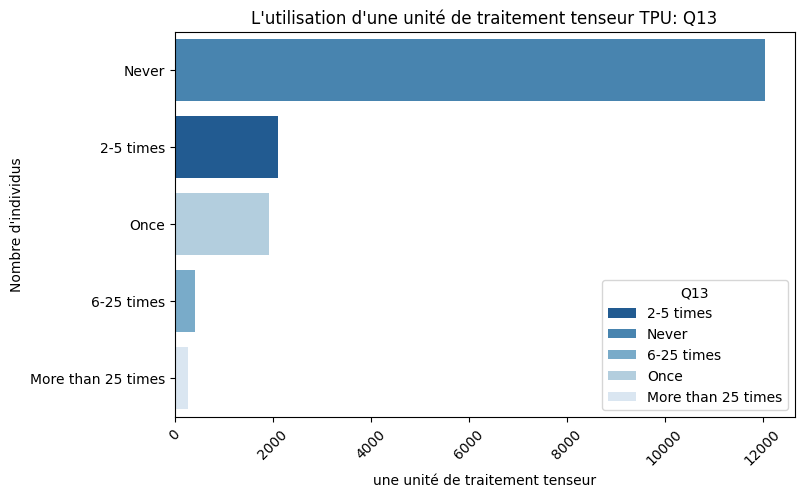

In [ ]:
#Q13. Approximately how many times have you used a TPU (tensor processing unit)?
#Q13. Environ combien de fois avez-vous utilisé un TPU (unité de traitement tenseur) ?
# la taille de la figue
plt.figure(figsize=(8,5))
# le nombre d'occurences pour les TPU
une_TPU= df['Q13'].value_counts().sort_values(ascending=False)
#Trier les catégories par fréquence décroissante
sorted_order = df['Q13'].value_counts().index
#tracer le graphique avec des barres triées
sns.countplot(y='Q13', data=df, order=sorted_order,hue= "Q13", palette="Blues_r")
plt.xlabel("une unité de traitement tenseur")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.title("L'utilisation d'une unité de traitement tenseur TPU: Q13")
plt.show();






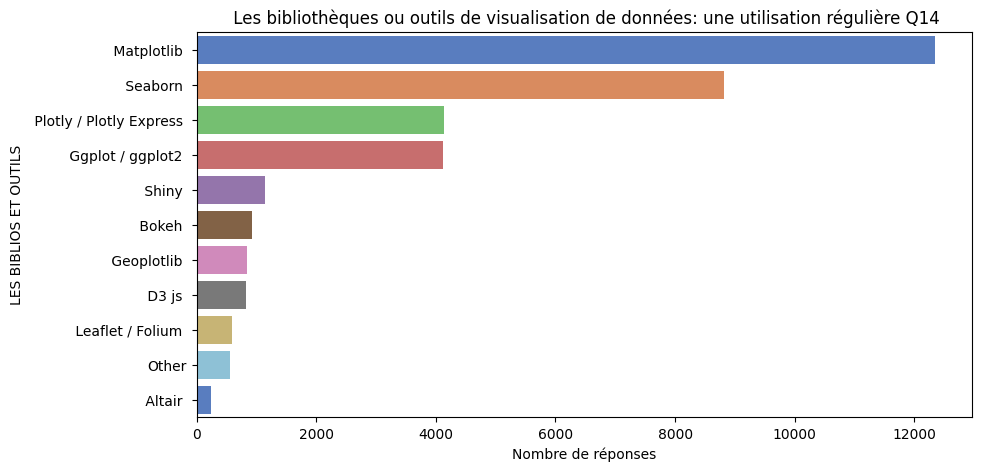

['Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER']


In [ ]:
#Q14_Part_1. What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib
#Q14_Part_1. Quelles bibliothèques ou outils de visualisation de données utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Matplotlib
# la question 14 il y' a 12 parties



# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q14_Part_1columns = [col for col in df.columns if'Q14' in col  or 'q14' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q14_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="muted")
plt.xlabel("Nombre de réponses")
plt.ylabel("LES BIBLIOS ET OUTILS")
plt.title(" Les bibliothèques ou outils de visualisation de données: une utilisation régulière Q14")
plt.show()
print(Q14_Part_1columns)

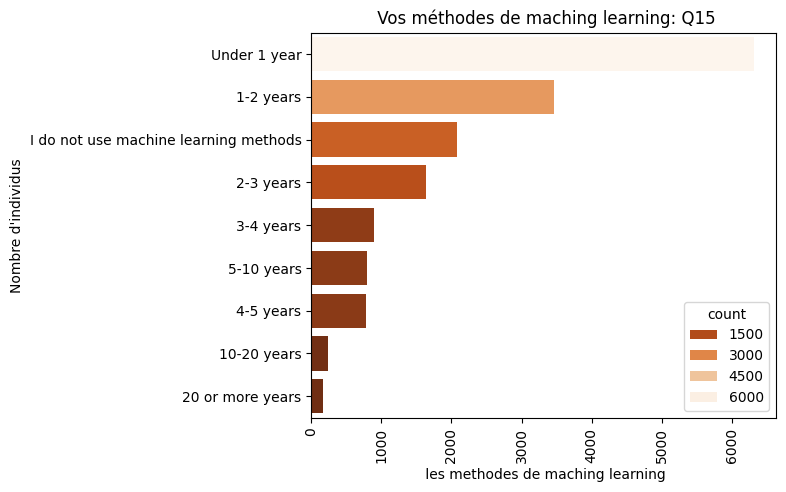

In [ ]:
#Q15. For how many years have you used machine learning methods?
#Q15. Depuis combien d’années utilisez-vous des méthodes de machine learning ?

# la taille de la figure
plt.figure(figsize=(6,5))
# compter le nombre d'occurences des méthodes de machine learning
Maching_learning= df['Q15'].value_counts().sort_values(ascending=False)

sns.barplot(y= Maching_learning.index, x= Maching_learning.values,palette="Oranges_r", hue= Maching_learning )
plt.xlabel(" les methodes de maching learning")
plt.xticks(rotation=90)
plt.ylabel("Nombre d'individus")
plt.title(" Vos méthodes de maching learning: Q15")
plt.show();



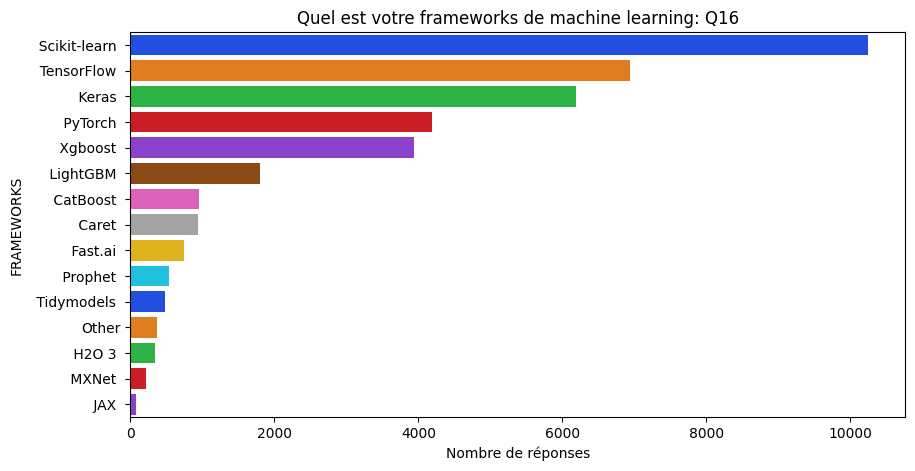

['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_OTHER']


In [ ]:
#Q16. Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn
#Q16. Parmi les frameworks de machine learning suivants, lesquels utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Scikit-learn
# la question 16 il y'a 16 parties


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q16

Q16_Part_1columns = [col for col in df.columns if 'Q16' in col ]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q16_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel("FRAMEWORKS")
plt.title("Quel est votre frameworks de machine learning: Q16")
plt.show()
print(Q16_Part_1columns)











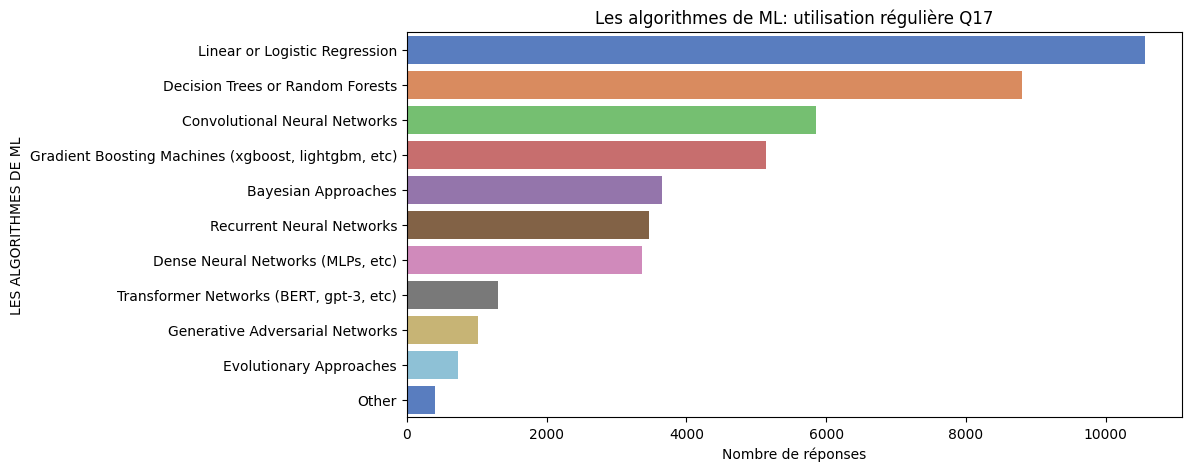

['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER']


In [ ]:
#Q17. Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression
#Q17. Parmi les algorithmes de ML suivants, lesquels utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) : - Choix sélectionné - Régression linéaire ou logistique
# la question 16 il y'a 12 parties

# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q17_Part_1columns = [col for col in df.columns if'Q17' in col  or 'q17' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q17_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="muted")
plt.xlabel("Nombre de réponses")
plt.ylabel("LES ALGORITHMES DE ML")
plt.title("Les algorithmes de ML: utilisation régulière Q17")
plt.show()
print(Q17_Part_1columns)

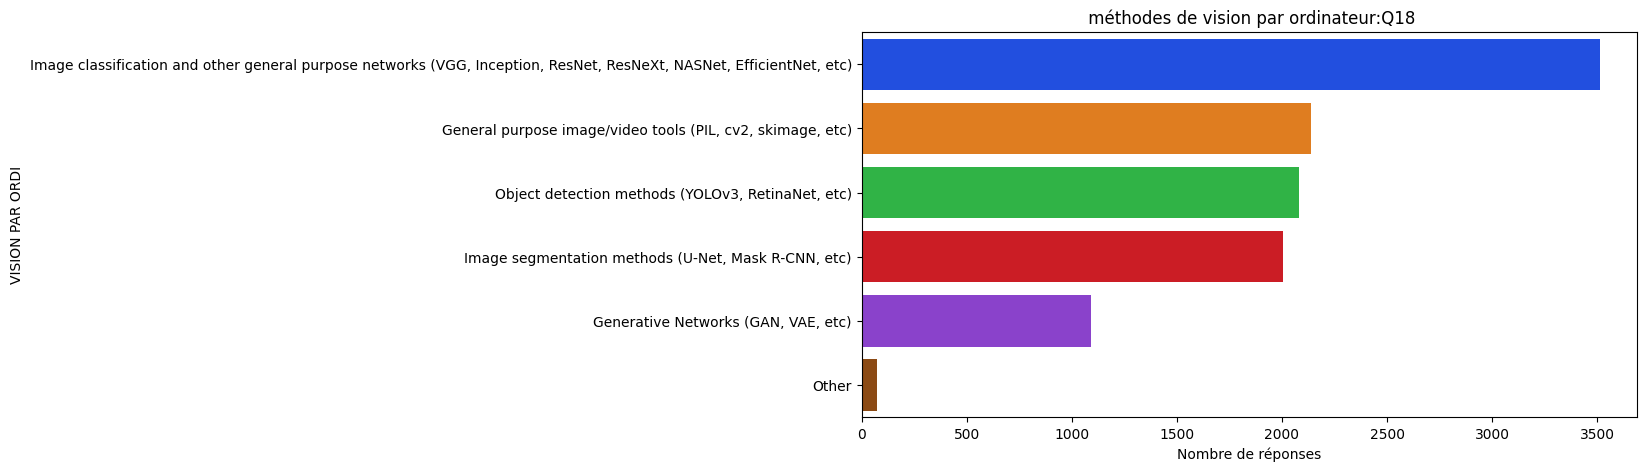

['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER']


In [ ]:
#Q18. Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)
#Q18. Quelles catégories de méthodes de vision par ordinateur utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Outils d'image/vidéo à usage général (PIL, cv2, skimage, etc.)
# la question 16 il y'a 7 parties

# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q18_Part_1columns = [col for col in df.columns if'Q18' in col  or 'q18' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q18_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel("VISION PAR ORDI")
plt.title(" méthodes de vision par ordinateur:Q18")
plt.show()
print(Q18_Part_1columns)

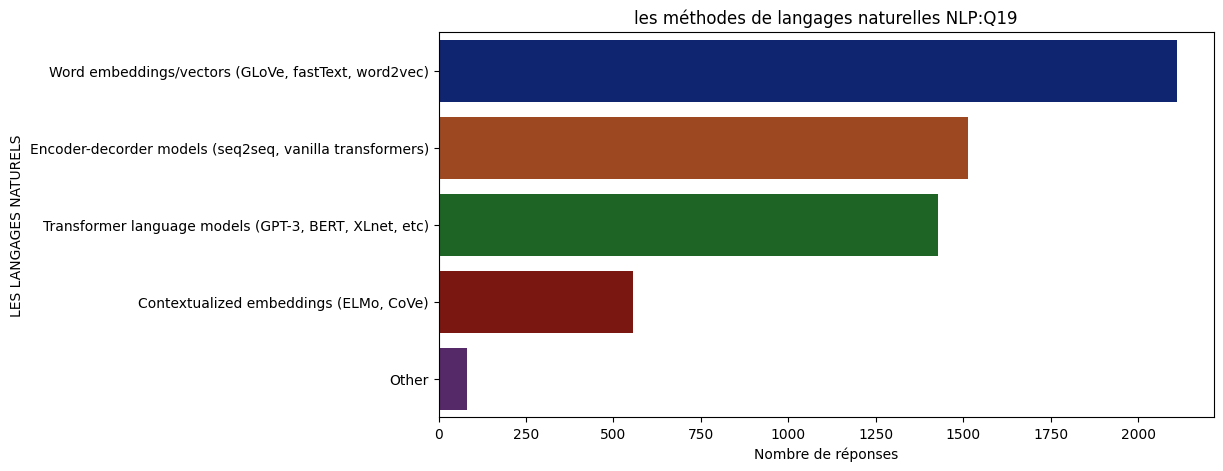

['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER']


In [ ]:
#Q19. Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)
#Q19. Parmi les méthodes de traitement du langage naturel (NLP) suivantes, lesquelles utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Intégrations/vecteurs de mots (GLoVe, fastText, word2vec)
# la question 16 il y'a 6 parties


# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q19_Part_1columns = [col for col in df.columns if'Q19' in col  or 'q19' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q19_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel("LES LANGAGES NATURELS")
plt.title("les méthodes de langages naturelles NLP:Q19")
plt.show()
print(Q19_Part_1columns)

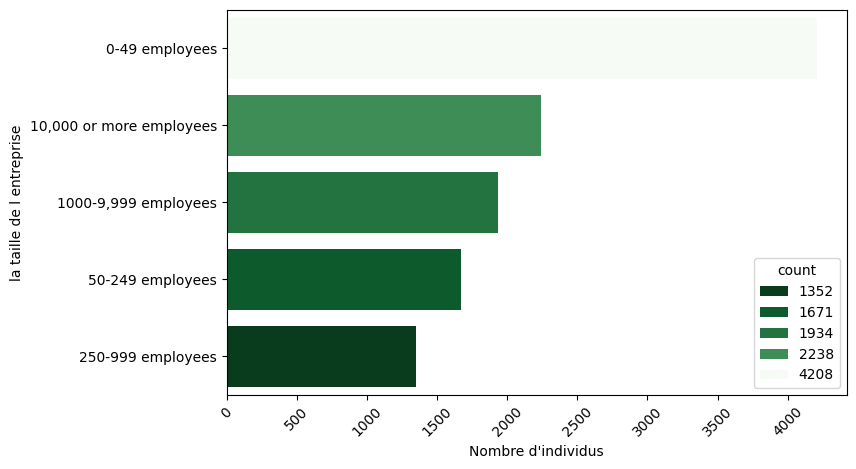

In [ ]:
#Q20. What is the size of the company where you are employed?
#Q20. Quelle est la taille de l’entreprise dans laquelle vous travaillez ?
# la taille de la figure
plt.figure(figsize=(8,5))
# la taille des entreprises par ordre décroissant
order= sorted_order = df['Q20'].value_counts().index
# le comptage des occurences de la taille des entreprises
entreprise= df['Q20'].value_counts().sort_index()
# afficher les barres
sns.barplot(y=entreprise.index, x=entreprise.values, order= sorted_order, palette= "Greens_r", hue=entreprise)
plt.ylabel("la taille de l entreprise")
plt.xticks(rotation=45)
plt.xlabel("Nombre d'individus")
plt.show();

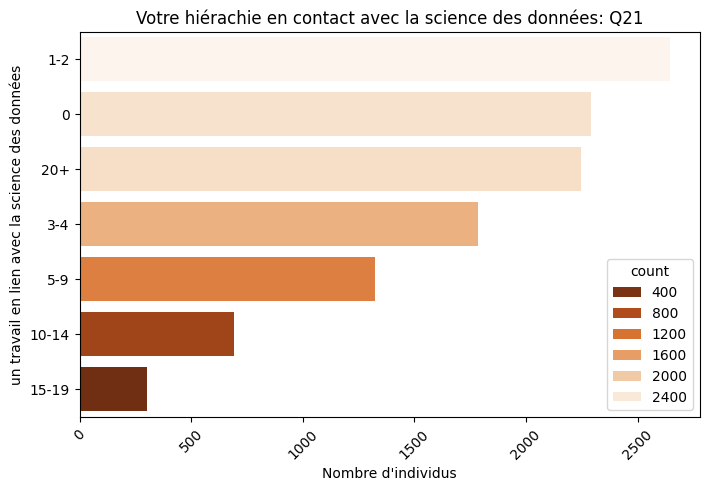

In [ ]:
#Q21. Approximately how many individuals are responsible for data science workloads at your place of business?
#Q21. Environ combien de personnes sont responsables des charges de travail liées à la science des données sur votre lieu de travail ?

# la taille de la figure
plt.figure(figsize=(8,5))
# le compter le nombre d'occurence
science_des_données= df['Q21'].value_counts().sort_index()
# classer par order décroissant
order=sorted_order= df['Q21'].value_counts().index
# afficher le graphique
sns.barplot(y=science_des_données.index, x=science_des_données.values, order=sorted_order, palette="Oranges_r", hue= science_des_données )
plt.ylabel("un travail en lien avec la science des données")
plt.xticks(rotation=45)
plt.xlabel("Nombre d'individus")
plt.title("Votre hiérachie en contact avec la science des données: Q21")
plt.show();

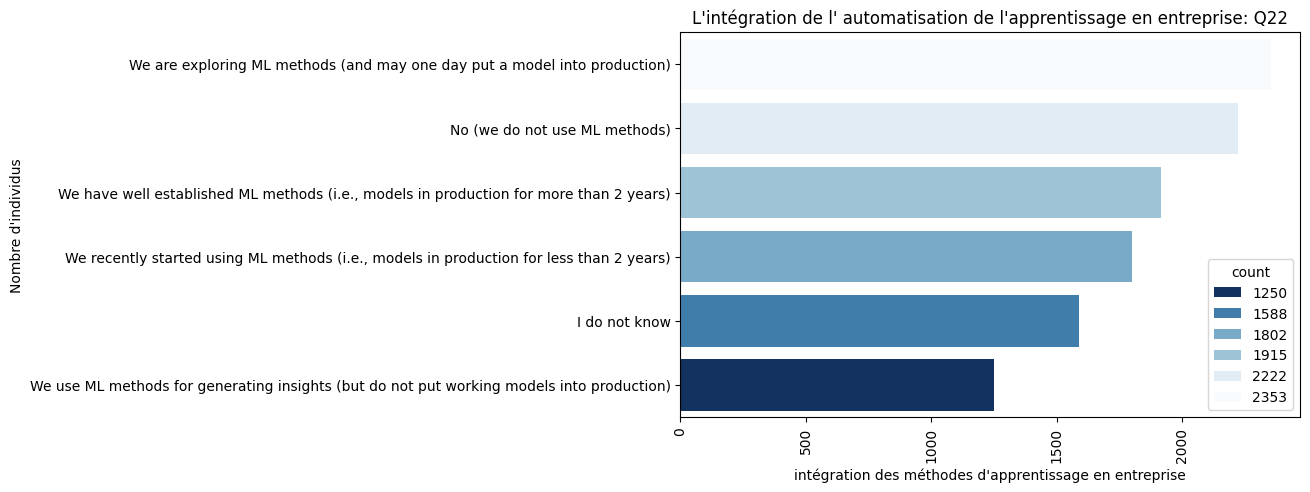

In [ ]:
#Q22. Does your current employer incorporate machine learning methods into their business?
#Q22. Votre employeur actuel intègre-t-il des méthodes d'apprentissage automatique dans son entreprise ?
# la taille du graphique
plt.figure(figsize=(8,5))
# compter le nombre d'occurence
un_type_de_plateforme= df['Q22'].value_counts(). sort_values(ascending=False)
# classer par ordre décroissant
order=sorted_order= df['Q22'].value_counts().index
# afficher le graphique
sns.barplot(y=un_type_de_plateforme.index, x=un_type_de_plateforme.values, palette="Blues_r", hue = un_type_de_plateforme)
plt.xlabel("intégration des méthodes d'apprentissage en entreprise")
plt.xticks(rotation=90)
plt.ylabel("Nombre d'individus")
plt.title("L'intégration de l' automatisation de l'apprentissage en entreprise: Q22")
plt.show();

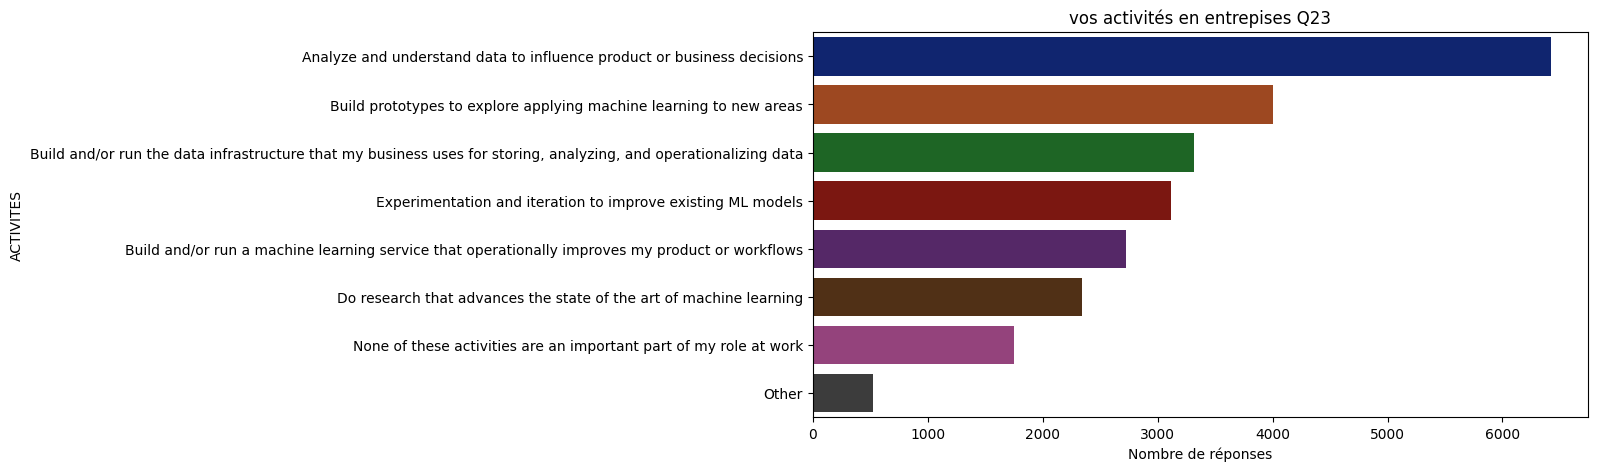

['Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER']


In [ ]:
#Q23. Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions
#Q23. Sélectionnez toutes les activités qui constituent une partie importante de votre rôle au travail : (Sélectionnez toutes les réponses qui s'appliquent) - Choix sélectionné - Analysez et comprenez les données pour influencer les décisions relatives aux produits ou aux affaires.
# 8 parties pour cette la question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q23_Part_1columns = [col for col in df.columns if'Q23' in col  or 'q23' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q23_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel("ACTIVITES")
plt.title("vos activités en entrepises Q23")
plt.show()
print(Q23_Part_1columns)



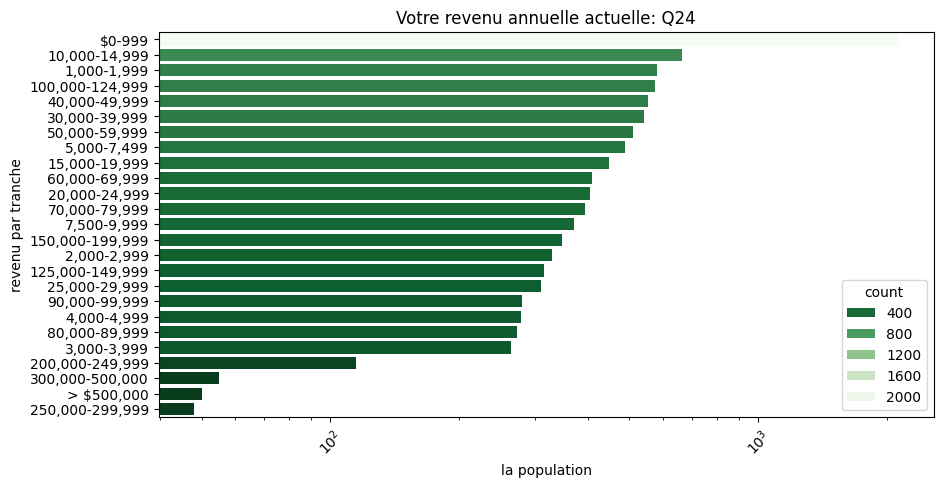

In [ ]:
#Q24. What is your current yearly compensation (approximate $USD)?
#Q24. Quelle est votre rémunération annuelle actuelle (environ $ USD) ?
# la taille du graphique
plt.figure(figsize=(10,5))
le_revenu_annuelle_actuelle= df['Q24'].value_counts().sort_index()
# classer par ordre décroissant
order=sorted_order= df['Q24'].value_counts().index
# afficher le graphique
sns.barplot(y=le_revenu_annuelle_actuelle.index, x=le_revenu_annuelle_actuelle.values, order=sorted_order, palette="Greens_r", hue=le_revenu_annuelle_actuelle)
plt.xlabel("la population")
plt.xscale("log")
plt.xticks(rotation=45)
plt.ylabel("revenu par tranche")
plt.title("Votre revenu annuelle actuelle: Q24")
plt.show();

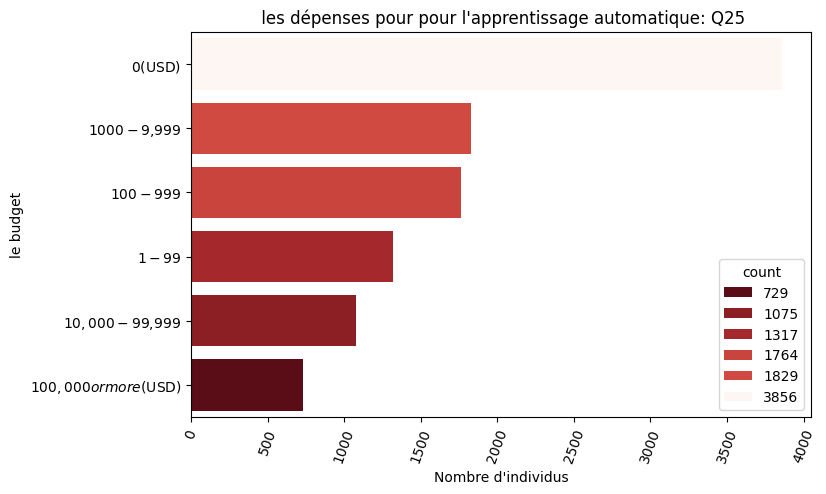

In [ ]:
#Q25.Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?
#Q25.Approximativement combien d'argent avez-vous (ou votre équipe) dépensé en services d'apprentissage automatique et/ou de cloud computing à la maison (ou au travail) au cours des 5 dernières années (environ USD) ?
les_dépenses = df['Q25'].value_counts().sort_index()
plt.figure(figsize=(8,5))
# classer par ordre décroissant
order=sorted_order= df['Q25'].value_counts().index
sns.barplot(y=les_dépenses.index, x=les_dépenses.values, order= sorted_order, palette="Reds_r", hue= les_dépenses)
plt.ylabel("le budget")
plt.xticks(rotation=70)
plt.xlabel("Nombre d'individus")
plt.title(" les dépenses pour pour l'apprentissage automatique: Q25")
plt.show();


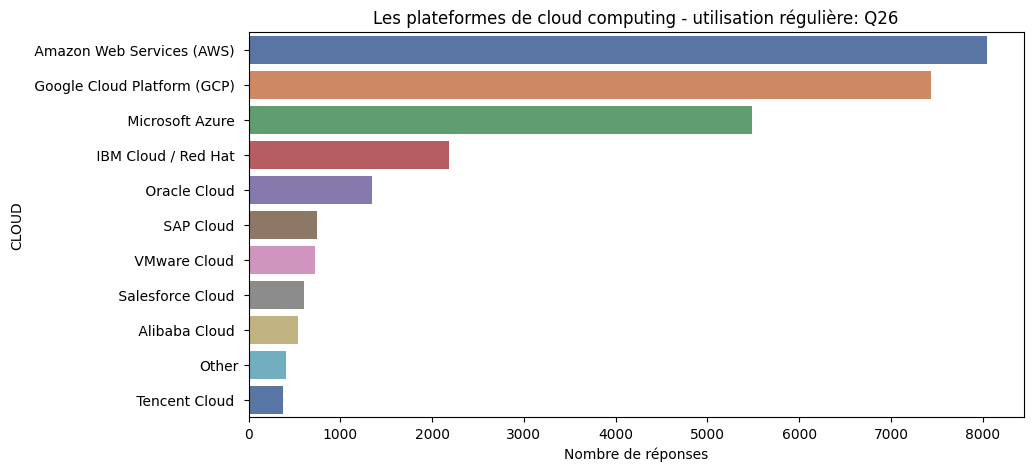

['Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q26_A_Part_11', 'Q26_A_OTHER', 'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3', 'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 'Q26_B_Part_7', 'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11', 'Q26_B_OTHER']


In [ ]:
#Q26_A_Part_1. Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS)
#Q26_A_Part_1. Parmi les plateformes de cloud computing suivantes, lesquelles utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon Web Services (AWS)
#12 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par
Q26_A_Part_1columns = [col for col in df.columns if'Q26' in col  or 'q26' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q26_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="deep")
plt.xlabel("Nombre de réponses")
plt.ylabel("CLOUD")
plt.title("Les plateformes de cloud computing - utilisation régulière: Q26")
plt.show()
print(Q26_A_Part_1columns)


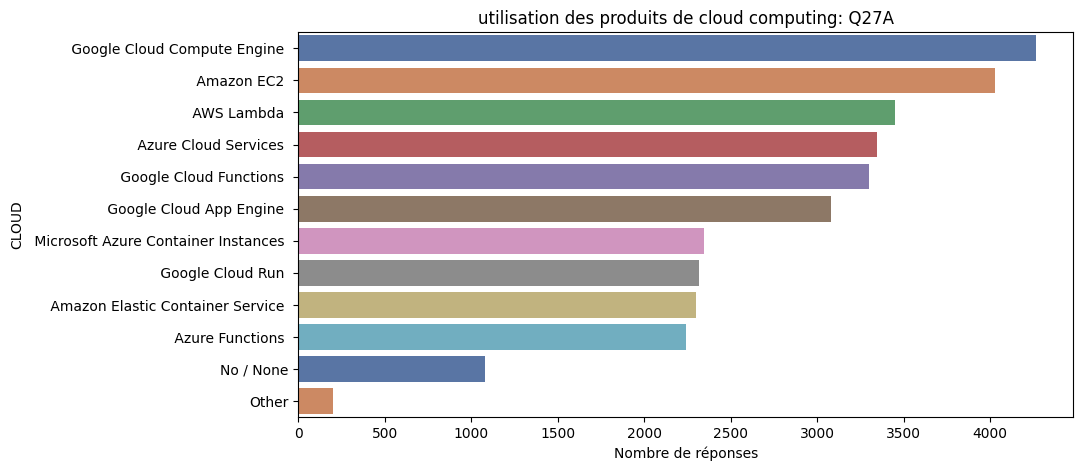

['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER']


In [ ]:
#Q27_A_Part_1. Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Amazon EC2
#Q27_A_Part_1. Utilisez-vous régulièrement l’un des produits de cloud computing suivants ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon EC2
# 12 parties pour cette question

# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q28A
Q27_A_Part_1columns = [col for col in df.columns if'Q27' in col  or 'q27' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q27_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="deep")
plt.xlabel("Nombre de réponses")
plt.ylabel("CLOUD")
plt.title("utilisation des produits de cloud computing: Q27A")
plt.show()
print(Q27_A_Part_1columns)


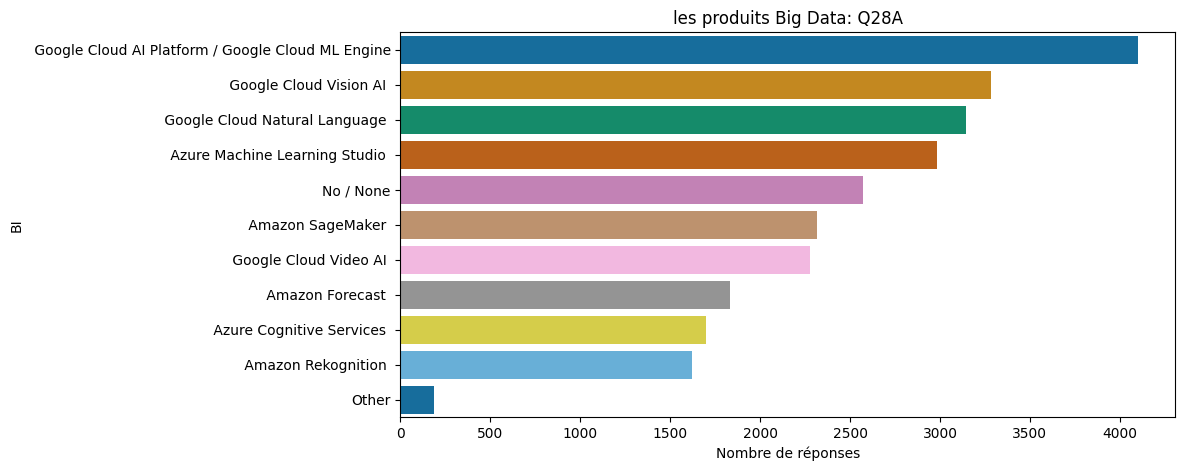

['Q28_A_Part_1', 'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_4', 'Q28_A_Part_5', 'Q28_A_Part_6', 'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9', 'Q28_A_Part_10', 'Q28_A_OTHER', 'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7', 'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER']


In [ ]:
#Q28_A_Part_1. Do you use any of the following machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Amazon SageMaker
#Q28_A_Part_1. Utilisez-vous régulièrement l’un des produits d’apprentissage automatique suivants ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon SageMaker
# 11 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q28A
Q28_A_Part_1columns = [col for col in df.columns if'Q28' in col  or 'q28' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q28_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel("BI")
plt.title("les produits Big Data: Q28A")
plt.show()
print(Q28_A_Part_1columns)

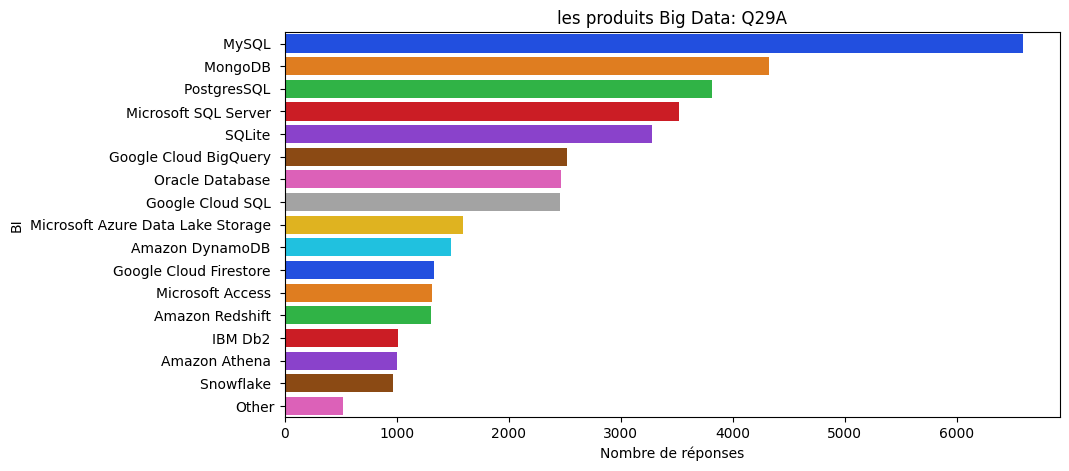

['Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7', 'Q29_A_Part_8', 'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'Q29_A_Part_17', 'Q29_A_OTHER', 'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4', 'Q29_B_Part_5', 'Q29_B_Part_6', 'Q29_B_Part_7', 'Q29_B_Part_8', 'Q29_B_Part_9', 'Q29_B_Part_10', 'Q29_B_Part_11', 'Q29_B_Part_12', 'Q29_B_Part_13', 'Q29_B_Part_14', 'Q29_B_Part_15', 'Q29_B_Part_16', 'Q29_B_Part_17', 'Q29_B_OTHER']


In [ ]:
#Q29_A_Part_1. Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL
#Q29_A_Part_1. Parmi les produits Big Data suivants (bases de données relationnelles, entrepôts de données, lacs de données ou similaires), lesquels utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - MySQL
#18 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q29A
Q29_A_Part_1columns = [col for col in df.columns if'Q29' in col  or 'q29' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q29_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel("BI")
plt.title("les produits Big Data: Q29A")
plt.show()
print(Q29_A_Part_1columns)

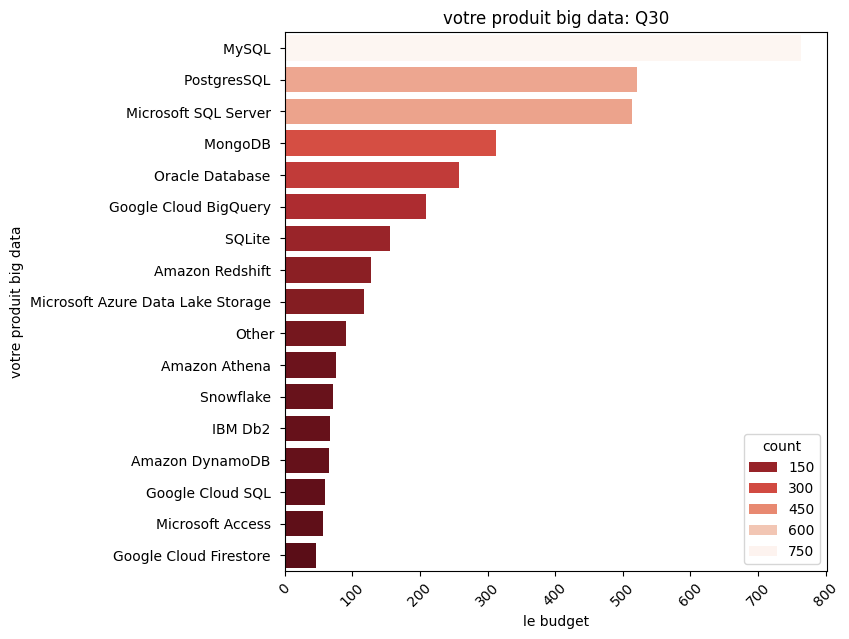

In [ ]:
#Q30. Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice
#Q30. Lequel des produits Big Data suivants (base de données relationnelle, entrepôt de données, lac de données ou similaire) utilisez-vous le plus souvent ? - Choix sélectionné
votre_produit_big_data= df['Q30'].value_counts().sort_index()
plt.figure(figsize=(7,7))
# classer par ordre décroissant
order=sorted_order= df['Q30'].value_counts().index
sns.barplot(y=votre_produit_big_data.index, x=votre_produit_big_data.values, order=sorted_order,  palette= "Reds_r", hue= votre_produit_big_data)
plt.ylabel("votre produit big data")
plt.xticks(rotation=45)
plt.xlabel("le budget")
plt.title("votre produit big data: Q30")
plt.show();

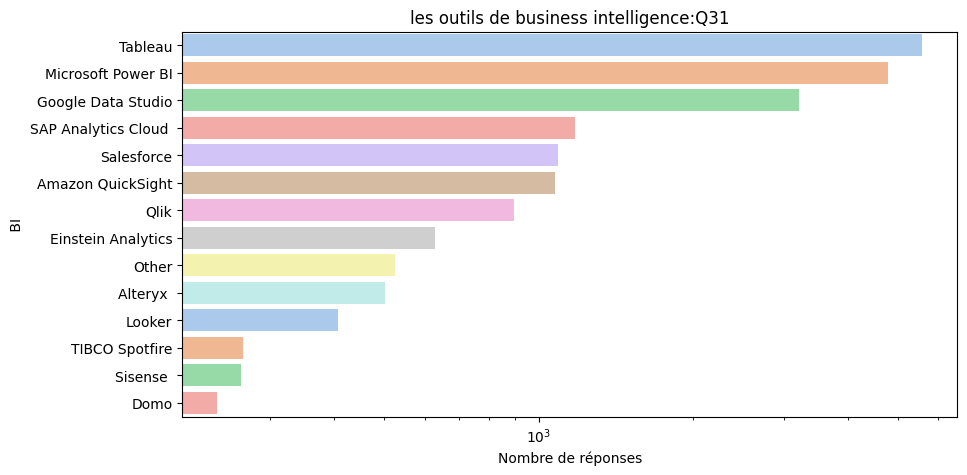

['Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8', 'Q31_A_Part_9', 'Q31_A_Part_10', 'Q31_A_Part_11', 'Q31_A_Part_12', 'Q31_A_Part_13', 'Q31_A_Part_14', 'Q31_A_OTHER', 'Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4', 'Q31_B_Part_5', 'Q31_B_Part_6', 'Q31_B_Part_7', 'Q31_B_Part_8', 'Q31_B_Part_9', 'Q31_B_Part_10', 'Q31_B_Part_11', 'Q31_B_Part_12', 'Q31_B_Part_13', 'Q31_B_Part_14', 'Q31_B_OTHER']


In [ ]:
#Q31_A_Part_1. Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon QuickSight
#Q31_A_Part_1. Parmi les outils de business intelligence suivants, lesquels utilisez-vous régulièrement ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon QuickSight
#15 parties pour cette question

# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q31
Q31_A_Part_13columns = [col for col in df.columns if'Q31' in col  or 'q31' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q31_A_Part_13columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="pastel")
plt.xlabel("Nombre de réponses")
plt.ylabel(" BI ")
plt.xscale("log")
plt.title("les outils de business intelligence:Q31")
plt.show()
print(Q31_A_Part_13columns)



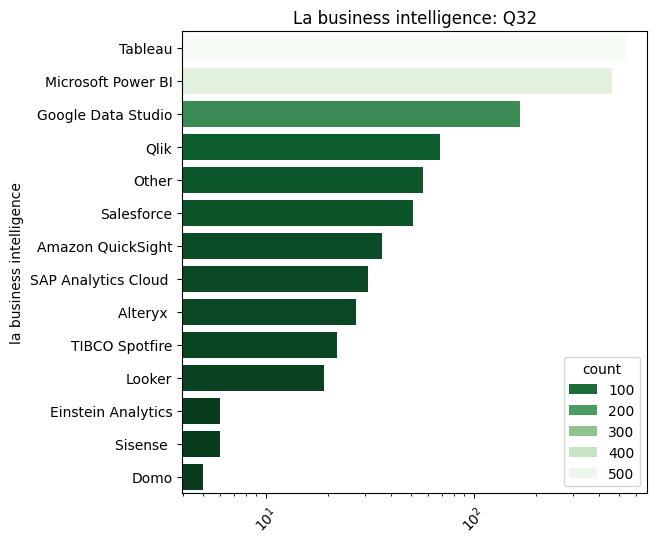

In [ ]:
#Q32. Which of the following business intelligence tools do you use most often? - Selected Choice
#Q32. Parmi les outils de business intelligence suivants, lesquels utilisez-vous le plus souvent ? - Choix sélectionné

votre_produit_big_data= df['Q32'].value_counts().sort_index()
plt.figure(figsize=(6,6))
# classer par ordre croissant
order=sorted_order= df['Q32'].value_counts().index
sns.barplot(y=votre_produit_big_data.index, x=votre_produit_big_data.values, order=sorted_order, palette="Greens_r", hue=votre_produit_big_data )
plt.ylabel("la business intelligence")
plt.xticks(rotation=45)
plt.xscale("log")
plt.title("La business intelligence: Q32")
plt.show();

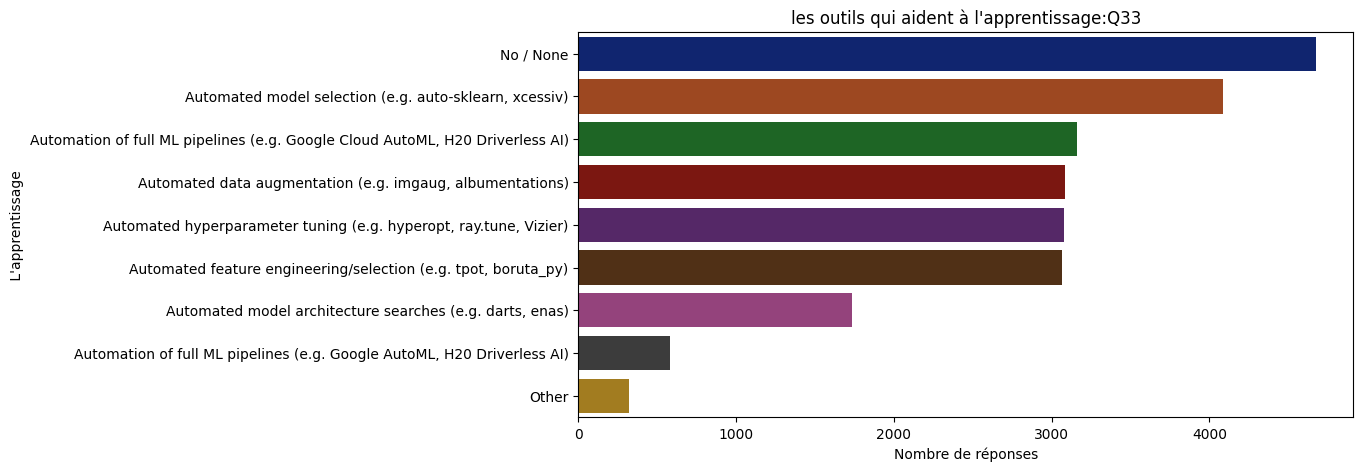

['Q33_A_Part_1', 'Q33_A_Part_2', 'Q33_A_Part_3', 'Q33_A_Part_4', 'Q33_A_Part_5', 'Q33_A_Part_6', 'Q33_A_Part_7', 'Q33_A_OTHER', 'Q33_B_Part_1', 'Q33_B_Part_2', 'Q33_B_Part_3', 'Q33_B_Part_4', 'Q33_B_Part_5', 'Q33_B_Part_6', 'Q33_B_Part_7', 'Q33_B_OTHER']


In [ ]:
#Q33_A_Part_1. Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)
#Q33_A_Part_1. Utilisez-vous régulièrement des outils d'apprentissage automatique automatisés (ou des outils AutoML partiels) ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Augmentation automatisée des données (par exemple, imgaug, albumentations)
# 8 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q33
Q33_A_Part_1columns = [col for col in df.columns if'Q33' in col  or 'q33' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q33_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel(" L'apprentissage ")
plt.title("les outils qui aident à l'apprentissage:Q33")
plt.show()
print(Q33_A_Part_1columns)



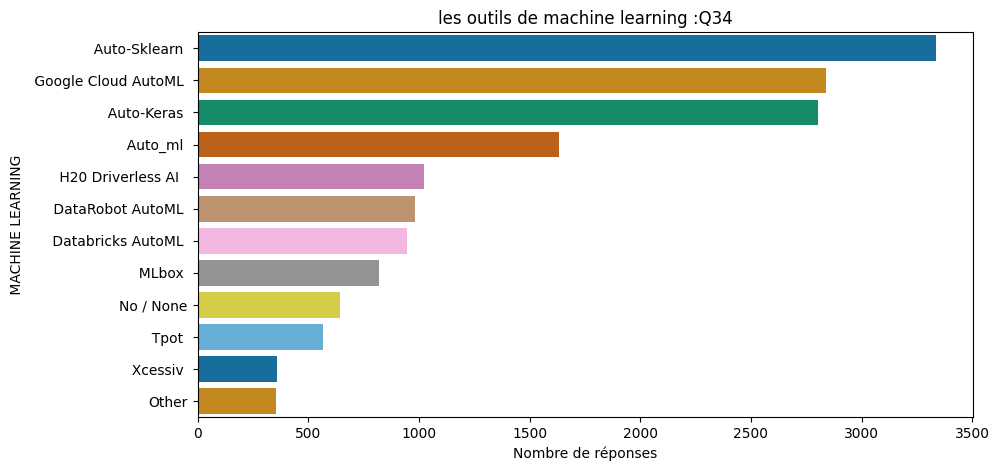

['Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q34_A_Part_11', 'Q34_A_OTHER', 'Q34_B_Part_1', 'Q34_B_Part_2', 'Q34_B_Part_3', 'Q34_B_Part_4', 'Q34_B_Part_5', 'Q34_B_Part_6', 'Q34_B_Part_7', 'Q34_B_Part_8', 'Q34_B_Part_9', 'Q34_B_Part_10', 'Q34_B_Part_11', 'Q34_B_OTHER']


In [ ]:
#Q34_A_Part_1. Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud AutoML
#Q34_A_Part_1. Parmi les outils de machine learning automatisés suivants (ou outils AutoML partiels), lesquels utilisez-vous régulièrement ?  (Sélectionnez toutes les réponses applicables) – Choix sélectionné – Google Cloud AutoML


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q34
Q34_A_Part_1columns = [col for col in df.columns if'Q34' in col  or 'q34' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q34_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel(" MACHINE LEARNING ")
plt.title("les outils de machine learning :Q34")
plt.show()
print(Q34_A_Part_1columns)



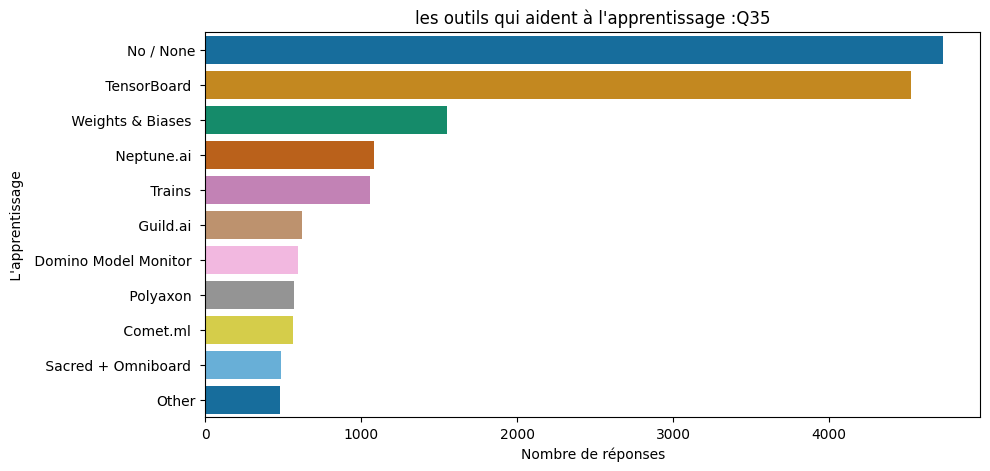

['Q35_A_Part_1', 'Q35_A_Part_2', 'Q35_A_Part_3', 'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6', 'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10', 'Q35_A_OTHER', 'Q35_B_Part_1', 'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5', 'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9', 'Q35_B_Part_10', 'Q35_B_OTHER']


In [ ]:
#Q35_A_Part_1. Do you use any tools to help manage machine learning experiments? (Select all that apply) - Selected Choice -  Neptune.ai
#Q35_A_Part_1. Utilisez-vous des outils pour vous aider à gérer les expériences d’apprentissage automatique ? (Sélectionnez toutes les réponses qui s'appliquent) - Choix sélectionné - Neptune.ai
#11 parties pour cette question

# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q35
Q35_A_Part_1columns = [col for col in df.columns if'Q35' in col  or 'q35' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q35_A_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel(" L'apprentissage ")
plt.title("les outils qui aident à l'apprentissage :Q35")
plt.show()
print(Q35_A_Part_1columns)


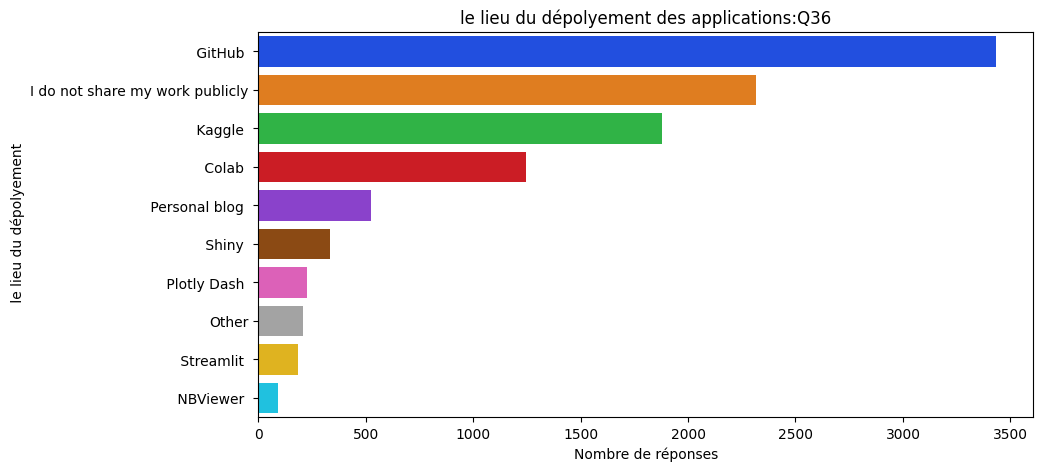

['Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8', 'Q36_Part_9', 'Q36_OTHER']


In [ ]:
#Q36_Part_1. Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply) - Selected Choice -  Plotly Dash
#Q36_Part_1. Où partagez-vous ou déployez-vous publiquement vos applications d’analyse de données ou d’apprentissage automatique ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Plotly Dash
# 10 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q36
Q36_Part_1columns = [col for col in df.columns if'Q36' in col  or 'q36' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q36_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel(" le lieu du dépolyement")
plt.title("le lieu du dépolyement des applications:Q36")
plt.show()
print(Q36_Part_1columns)


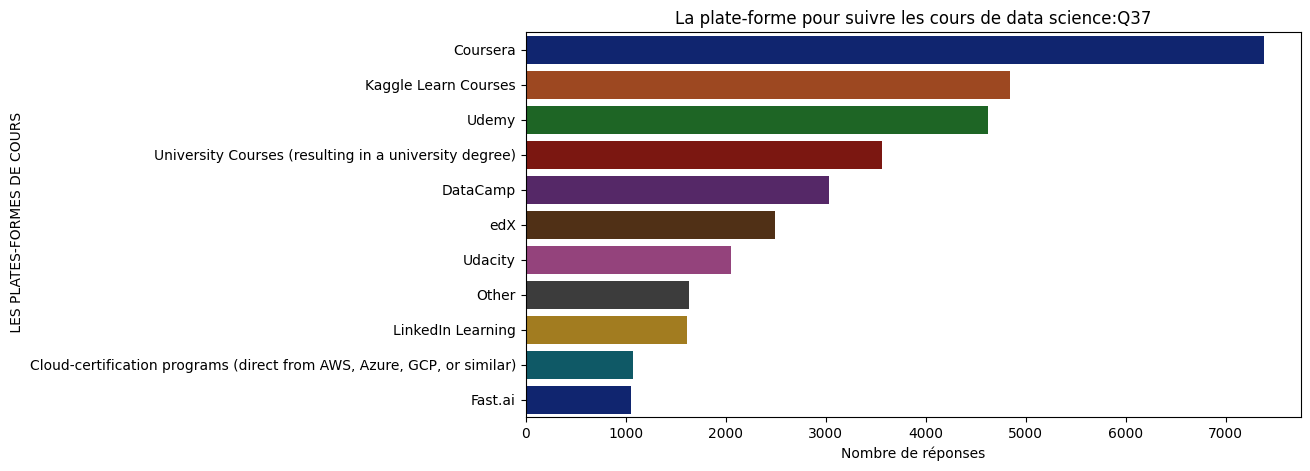

['Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER']


In [ ]:
#Q37_Part_1. On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera
#Q37_Part_1. Sur quelles plateformes avez-vous commencé ou suivi des cours de data science ? (Sélectionnez toutes les réponses qui s'appliquent) - Choix sélectionné - Coursera
# 12 parties pour cette question

# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q37
Q37_Part_1columns = [col for col in df.columns if'Q37' in col  or 'q37' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q37_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel(" LES PLATES-FORMES DE COURS")
plt.title("La plate-forme pour suivre les cours de data science:Q37")
plt.show()
print(Q37_Part_1columns)


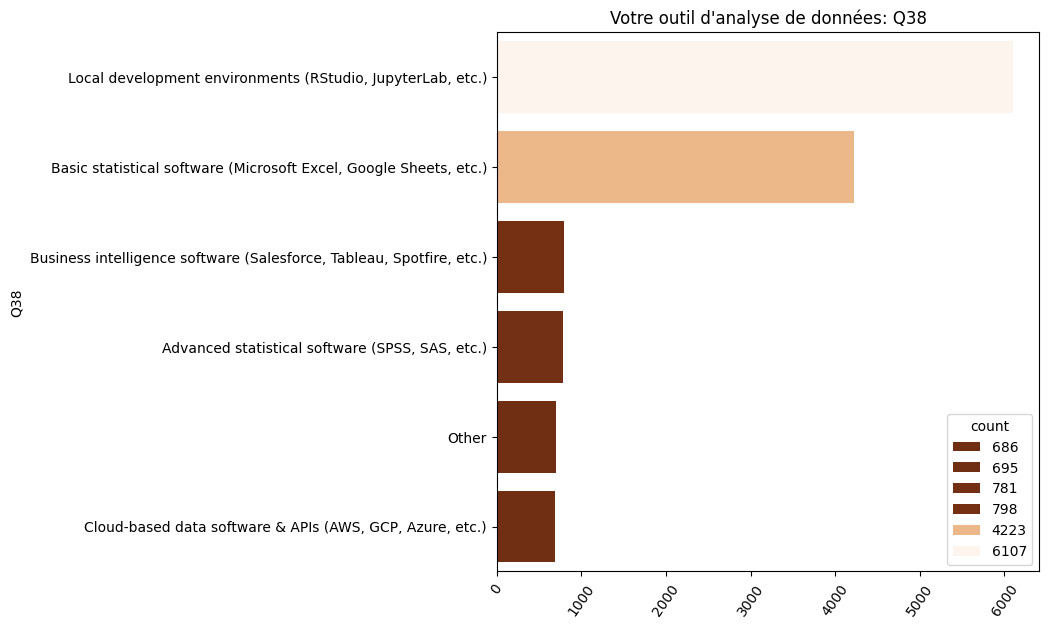

In [ ]:
#Q38. What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
#Q38. Quel est le principal outil que vous utilisez au travail ou à l’école pour analyser les données ? (Inclure la réponse textuelle) – Choix sélectionné
votre_outil_d_analyse_de_données= df['Q38'].value_counts().sort_index()
plt.figure(figsize=(7,7))
#classer order décroissant
order=sorted_order= df['Q38'].value_counts().index
sns.barplot(y=votre_outil_d_analyse_de_données.index, x=votre_outil_d_analyse_de_données.values, order=sorted_order,  palette="Oranges_r", hue= votre_outil_d_analyse_de_données)
plt.xticks(rotation=55)
plt.title("Votre outil d'analyse de données: Q38")
plt.show();


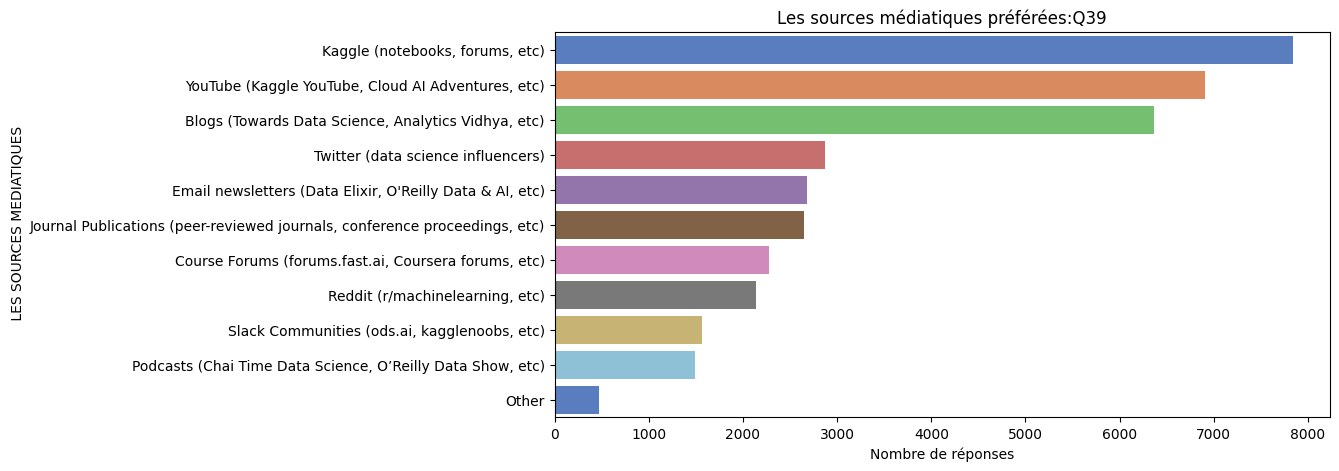

['Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11', 'Q39_OTHER']


In [ ]:
#Q39_Part_1. Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)
#Q39_Part_1. Quelles sont vos sources médiatiques préférées qui traitent de sujets liés à la science des données ? (Sélectionnez toutes les réponses qui s'appliquent) - Selected Choice - Twitter (influenceurs de la science des données)
#12 parties pour cette question

# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q39
Q39_Part_1columns = [col for col in df.columns if'Q39' in col  or 'q39' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q39_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="muted")
plt.xlabel("Nombre de réponses")
plt.ylabel(" LES SOURCES MEDIATIQUES")
plt.title("Les sources médiatiques préférées:Q39")
plt.show()
print(Q39_Part_1columns)


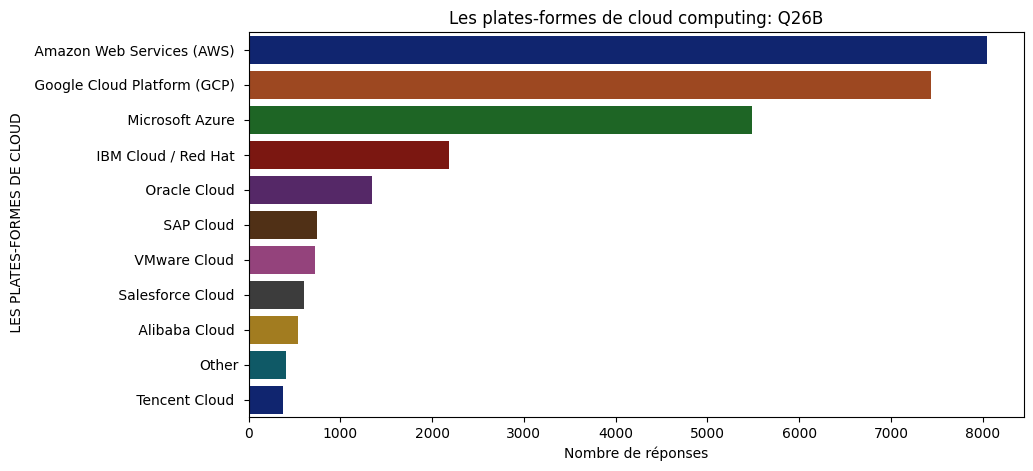

['Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q26_A_Part_11', 'Q26_A_OTHER', 'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3', 'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 'Q26_B_Part_7', 'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11', 'Q26_B_OTHER']


In [ ]:
#Q26_B_Part_1. Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice -  Amazon Web Services (AWS)
#Q26_B_Part_1. Parmi les plates-formes de cloud computing suivantes, lesquelles espérez-vous vous familiariser davantage au cours des deux prochaines années ? - Choix sélectionné - Amazon Web Services (AWS)
# 12 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q26
Q26_B_Part_1columns = [col for col in df.columns if'Q26' in col  or 'q26' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q26_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel(" LES PLATES-FORMES DE CLOUD")
plt.title("Les plates-formes de cloud computing: Q26B")
plt.show()
print(Q26_B_Part_1columns)

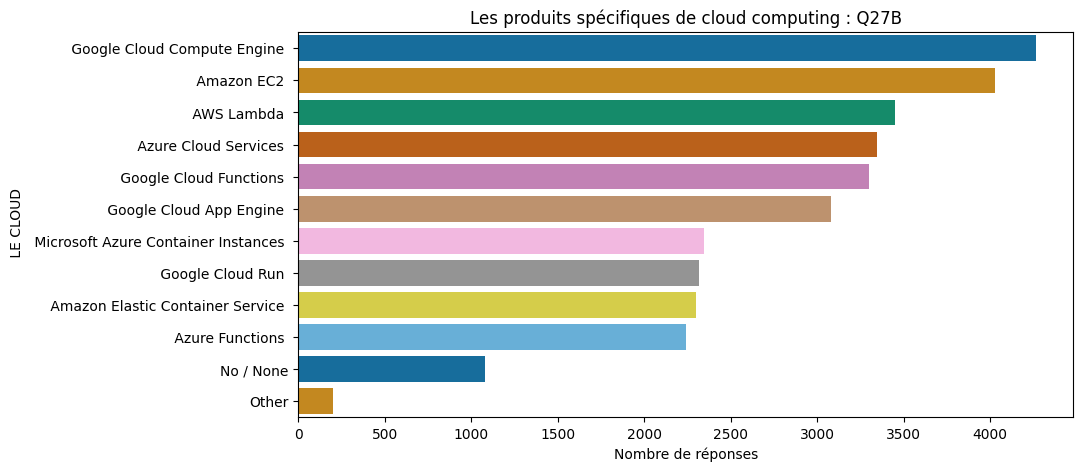

['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER']


In [ ]:
#Q27_B_Part_1. In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply) - Selected Choice -  Amazon EC2
#Q27_B_Part_1. Au cours des deux prochaines années, espérez-vous vous familiariser davantage avec l’un de ces produits spécifiques de cloud computing ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon EC2
# 12 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q27
Q27_B_Part_1columns = [col for col in df.columns if'Q27' in col  or 'q27' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q27_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel(" LE CLOUD")
plt.title("Les produits spécifiques de cloud computing : Q27B")
plt.show()
print(Q27_B_Part_1columns)

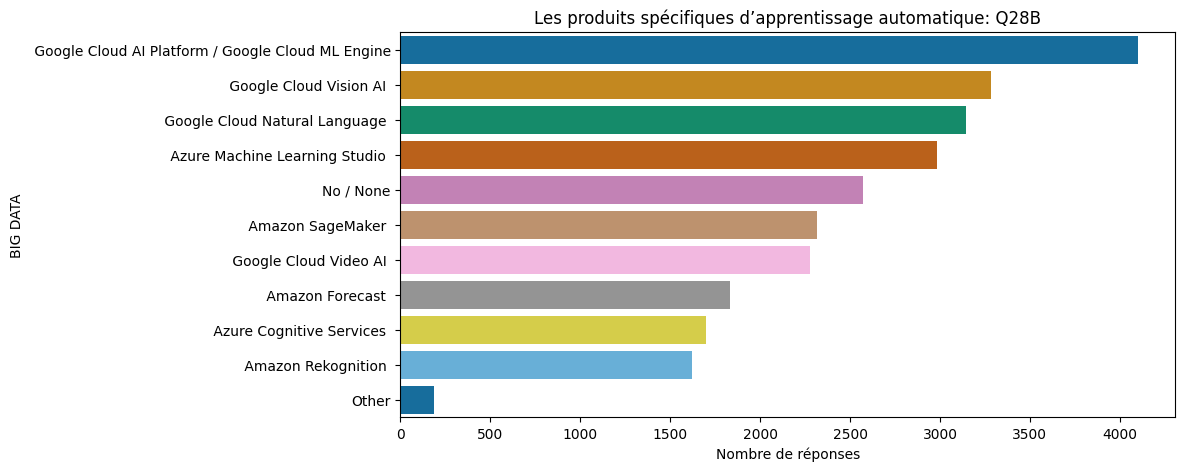

['Q28_A_Part_1', 'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_4', 'Q28_A_Part_5', 'Q28_A_Part_6', 'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9', 'Q28_A_Part_10', 'Q28_A_OTHER', 'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7', 'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER']


In [ ]:
#Q28_B_Part_1. In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply) - Selected Choice -  Amazon SageMaker
#Q28_B_Part_1. Au cours des deux prochaines années, espérez-vous vous familiariser davantage avec l’un de ces produits spécifiques d’apprentissage automatique ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Amazon SageMaker
# 11 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q28
Q28_B_Part_1columns = [col for col in df.columns if'Q28' in col  or 'q28' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q28_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel("BIG DATA")
plt.title("Les produits spécifiques d’apprentissage automatique: Q28B")
plt.show()
print(Q28_B_Part_1columns)


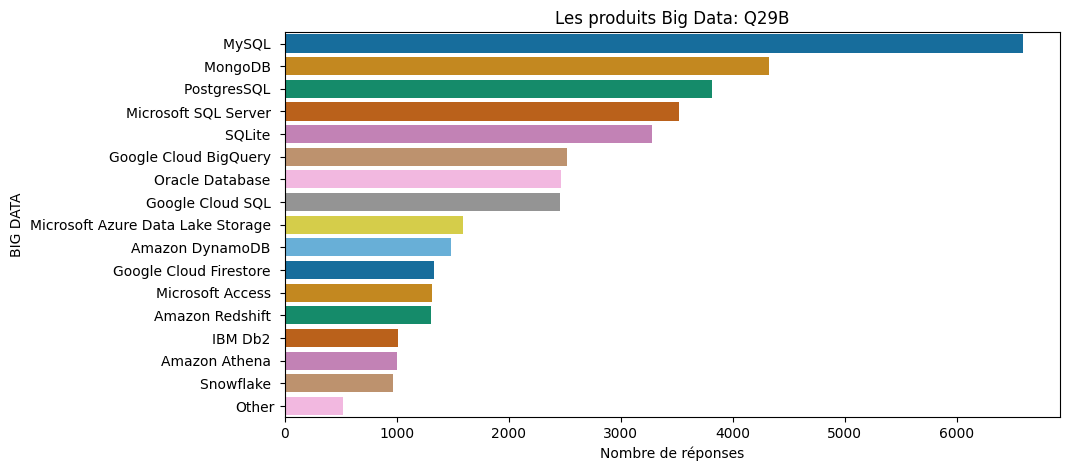

['Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7', 'Q29_A_Part_8', 'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'Q29_A_Part_17', 'Q29_A_OTHER', 'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4', 'Q29_B_Part_5', 'Q29_B_Part_6', 'Q29_B_Part_7', 'Q29_B_Part_8', 'Q29_B_Part_9', 'Q29_B_Part_10', 'Q29_B_Part_11', 'Q29_B_Part_12', 'Q29_B_Part_13', 'Q29_B_Part_14', 'Q29_B_Part_15', 'Q29_B_Part_16', 'Q29_B_Part_17', 'Q29_B_OTHER']


In [ ]:
#Q29_B_Part_1. Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - MySQL
#Q29_B_Part_1. Parmi les produits Big Data suivants (bases de données relationnelles, entrepôts de données, lacs de données ou similaires), lesquels espérez-vous vous familiariser davantage au cours des deux prochaines années ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - MySQL
# 18 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q29
Q29_B_Part_1columns = [col for col in df.columns if'Q29' in col  or 'q29' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q29_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="colorblind")
plt.xlabel("Nombre de réponses")
plt.ylabel("BIG DATA")
plt.title("Les produits Big Data: Q29B")
plt.show()
print(Q29_B_Part_1columns)

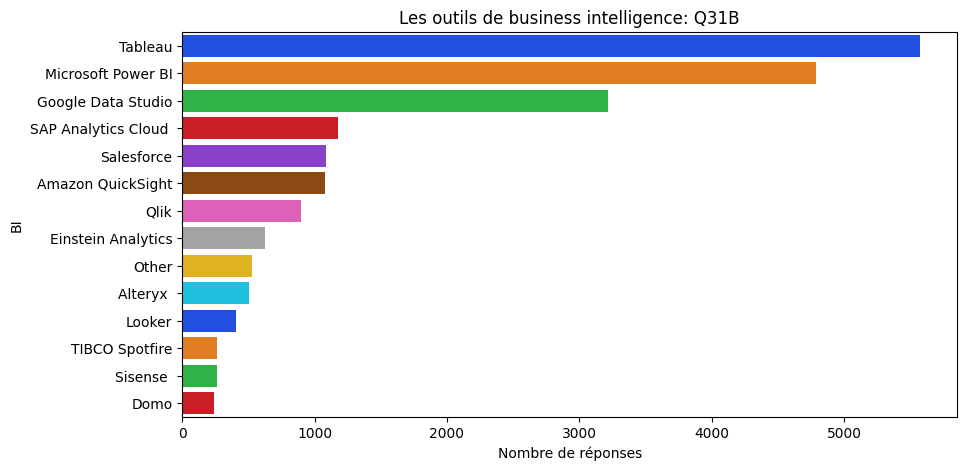

['Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8', 'Q31_A_Part_9', 'Q31_A_Part_10', 'Q31_A_Part_11', 'Q31_A_Part_12', 'Q31_A_Part_13', 'Q31_A_Part_14', 'Q31_A_OTHER', 'Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4', 'Q31_B_Part_5', 'Q31_B_Part_6', 'Q31_B_Part_7', 'Q31_B_Part_8', 'Q31_B_Part_9', 'Q31_B_Part_10', 'Q31_B_Part_11', 'Q31_B_Part_12', 'Q31_B_Part_13', 'Q31_B_Part_14', 'Q31_B_OTHER']


In [ ]:
#Q31_B_Part_1. Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft Power BI
#Q31_B_Part_1. Parmi les outils de business intelligence suivants, lesquels espérez-vous vous familiariser davantage au cours des deux prochaines années ? (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Microsoft Power BI
# 15 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q31

Q31_B_Part_1columns = [col for col in df.columns if'Q31' in col  or 'q31' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q31_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel("BI")
plt.title("Les outils de business intelligence: Q31B")
plt.show()
print(Q31_B_Part_1columns)

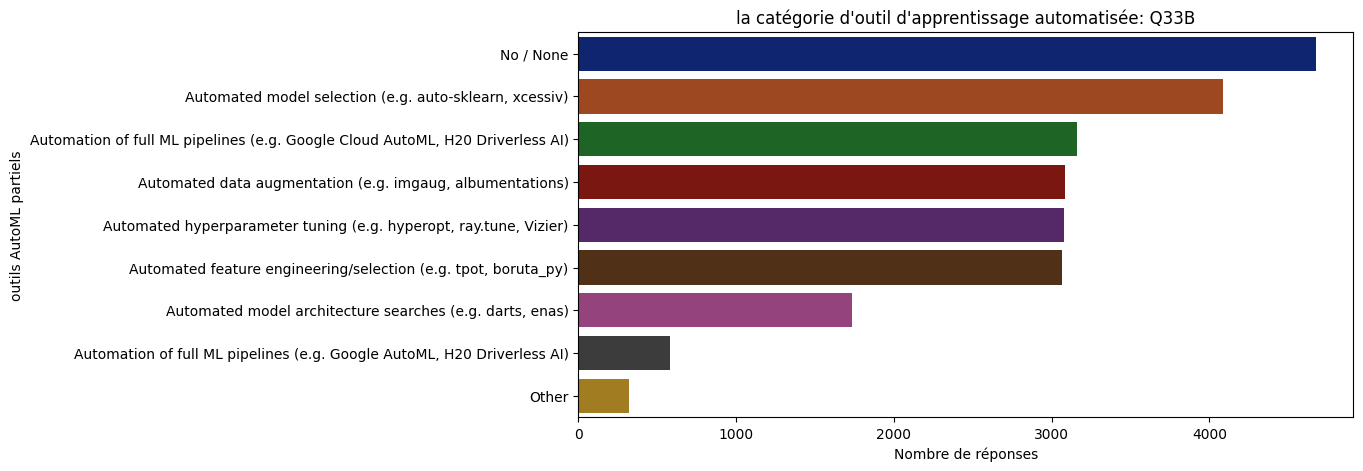

['Q33_A_Part_1', 'Q33_A_Part_2', 'Q33_A_Part_3', 'Q33_A_Part_4', 'Q33_A_Part_5', 'Q33_A_Part_6', 'Q33_A_Part_7', 'Q33_A_OTHER', 'Q33_B_Part_1', 'Q33_B_Part_2', 'Q33_B_Part_3', 'Q33_B_Part_4', 'Q33_B_Part_5', 'Q33_B_Part_6', 'Q33_B_Part_7', 'Q33_B_OTHER']


In [ ]:
#Q33_B_Part_1. Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)
#Q33_B_Part_1. Avec quelles catégories d’outils d’apprentissage automatique automatisés (ou d’outils AutoML partiels) espérez-vous vous familiariser davantage au cours des deux prochaines années ?  (Sélectionnez toutes les réponses applicables) - Choix sélectionné - Augmentation automatisée des données (par exemple, imgaug, albumentations)
#8 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q33

Q33_B_Part_1columns = [col for col in df.columns if'Q33' in col  or 'q33' in col]

# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q33_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="dark")
plt.xlabel("Nombre de réponses")
plt.ylabel("outils AutoML partiels")
plt.title("la catégorie d'outil d'apprentissage automatisée: Q33B")
plt.show()
print(Q33_B_Part_1columns)

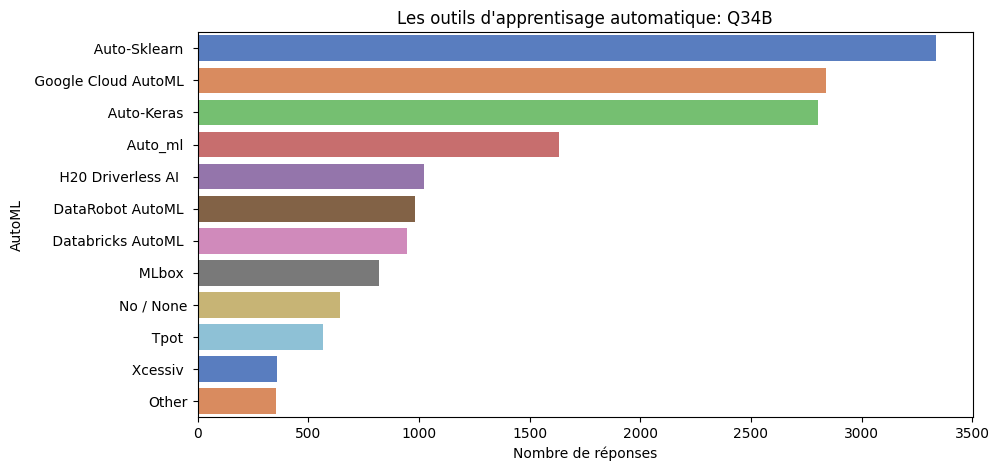

['Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q34_A_Part_11', 'Q34_A_OTHER', 'Q34_B_Part_1', 'Q34_B_Part_2', 'Q34_B_Part_3', 'Q34_B_Part_4', 'Q34_B_Part_5', 'Q34_B_Part_6', 'Q34_B_Part_7', 'Q34_B_Part_8', 'Q34_B_Part_9', 'Q34_B_Part_10', 'Q34_B_Part_11', 'Q34_B_OTHER']


In [ ]:
#Q34_B_Part_1. Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply) - Selected Choice -  Google Cloud AutoML
#Q34_B_Part_1. Avec quels outils d'apprentissage automatique automatisés spécifiques (ou outils AutoML partiels) espérez-vous vous familiariser davantage au cours des deux prochaines années ?  (Sélectionnez toutes les réponses applicables) – Choix sélectionné – Google Cloud AutoML
#12 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q34
Q34_B_Part_1columns = [col for col in df.columns if'Q34' in col  or 'q34' in col]
# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q34_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="muted")
plt.xlabel("Nombre de réponses")
plt.ylabel("AutoML")
plt.title("Les outils d'apprentisage automatique: Q34B")
plt.show()
print(Q34_B_Part_1columns)


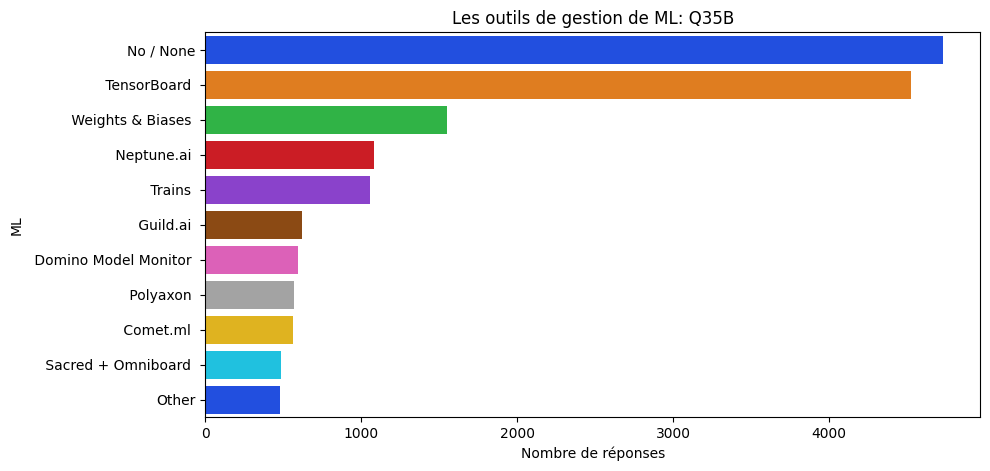

['Q35_A_Part_1', 'Q35_A_Part_2', 'Q35_A_Part_3', 'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6', 'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10', 'Q35_A_OTHER', 'Q35_B_Part_1', 'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5', 'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9', 'Q35_B_Part_10', 'Q35_B_OTHER']


In [ ]:
#Q35_B_Part_1. In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Neptune.ai
#Q35_B_Part_1. Au cours des deux prochaines années, espérez-vous vous familiariser davantage avec l'un de ces outils de gestion des expériences de ML ? (Sélectionnez toutes les réponses qui s'appliquent) - Choix sélectionné - Neptune.ai
# 11 parties pour cette question


# Faire une boucle for qui va interroger toutes les réponses qui commencent par Q35

Q35_B_Part_1columns = [col for col in df.columns if'Q35' in col  or 'q35' in col]


# Transformer les réponses multiples en une seule colonne
responses = pd.melt(df[Q35_B_Part_1columns], value_name="Réponse")['Réponse'].dropna()
# Compter les occurrences
response_counts = responses.value_counts().reset_index()
response_counts.columns = ['Réponse', 'Nombre']
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(data=response_counts, x='Nombre', y='Réponse', hue= "Réponse",palette="bright")
plt.xlabel("Nombre de réponses")
plt.ylabel("ML")
plt.title("Les outils de gestion de ML: Q35B")
plt.show()
print(Q35_B_Part_1columns)
